**Цель проекта**: Выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков.  

**Задачи проекта**:
- Выявление грейда требуемых специалистов;
- Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик;
- Определение типичного места работы для Аналитика данных и Системного аналитика, по определенным параметрам: ТОП-работодателей, заработная плата, тип занятости, график работы;
- Определение наиболее желаемых кандидатов по таким параметрам как "hard skills" и "soft skills", в том числе для каждого грейда по отдельности;
- Расчет помесячной динамики количества вакансий для Аналитика данных и системного аналитика.

**Описание полей в данных**  

**id** - Уникальный идентификатор вакансии.  
**name** - Название вакансии.  
**published_at** - Дата публикации.  
**alternate_url** - Ссылка на вакансию.  
**type** - Статус вакансии на момент получения данных от api и передачи их в базу.  
**employer** - Работодатель.  
**department** - Работодатель, отдел.  
**area** - Регион места работы.  
**experience** - Требуемый опыт работы.  
**key_skills** - Ключевые навыки, в том числе найденные при анализе полного текста вакансии. Поле генерируется после получения информации от api.  
**schedule** - График работы.  
**employment** - Тип занятости.  
**description** - Описание вакансии.  
**description_lemmatized** - Лемматизированное описание вакансии.  
**salary_from** - Нижняя граница предлагаемой заработной платы.  
**salary_to** - Верхняя граница предлагаемой заработной платы.  
**salary_bin** - Категория зарплаты.  
**key_skills_from_key_skills_field** - Ключевые навыки из поля вакансии key_skills.  
**hard_skills_from_description** - “Твердые” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.  
**soft_skills_from_description** - “Мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.



## 1. Подготовительный этап.

In [1]:
#импортируем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
from IPython.display import display
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import numpy as np

In [2]:
#загружаем и читаем исходные файлы
path = 'C://Users//Polet//Desktop//Обучение Анализ данных//4 модуль//МАСТЕРСКАЯ 07.10-21.10.24//'
data_da = pd.read_excel(path + 'vacancies_da (1).xlsx')
data_sa = pd.read_excel(path + 'vacancies_sa.xlsx')

#data_da = pd.read_excel(r'C:\Users\Polet\Desktop\Обучение Анализ данных\4 модуль\МАСТЕРСКАЯ 07.10-21.10.24\vacancies_da (1).xlsx')
#data_sa = pd.read_excel(r'C:\Users\Polet\Desktop\Обучение Анализ данных\4 модуль\МАСТЕРСКАЯ 07.10-21.10.24\vacancies_sa.xlsx')

In [3]:
#посмотрим на первый датафрейм с вакансиями Аналитик данных
data_da.head(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN


In [4]:
data_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

In [5]:
#посмотрим на второй датафрейм с вакансиями Системный аналитик
data_sa.head(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация


In [6]:
data_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1915 non-null   int64         
 1   name                              1915 non-null   object        
 2   published_at                      1915 non-null   datetime64[ns]
 3   alternate_url                     1915 non-null   object        
 4   type                              1915 non-null   object        
 5   employer                          1915 non-null   object        
 6   department                        361 non-null    object        
 7   area                              1915 non-null   object        
 8   experience                        1915 non-null   object        
 9   key_skills                        1915 non-null   object        
 10  schedule                          1915 non-null 

**Промежуточные выводы:**  
Оба датафрейма имеют одинаковый состав столбцов. Вакансий на Системного аналитика немного больше, чем на Аналитика данных. Перейдем к предобработке данных.

## 2. Предобработка данных.

Так как оба датафрейма имеют схожее строение по столбцам, можно их объединить в общий датафрейм. Но чтобы остался признак по типу вакансии DA или SA, создадим дополнительное поле type_of_job в каждом из исходных файлов.

In [7]:
#добавляем столбец с признаком DA
data_da['type_of_job']='DA'

In [8]:
#добавляем столбец с признаком SA
data_sa['type_of_job']='SA'

In [9]:
#объединяем 2 файла в 1 датафрейм методом concat
job_listing = pd.concat([data_da, data_sa])

In [10]:
#проверим количество строк в объединенной таблице
job_listing['type_of_job'].value_counts()

type_of_job
SA    1915
DA    1801
Name: count, dtype: int64

In [11]:
#проверим датафрейм на наличие явных дубликатов
print('Количество явных дубликатов:', job_listing.duplicated().sum())


Количество явных дубликатов: 0


Объединение данных прошло корректно. Явных дубликатов в датафрейме не выявлено. Проверим теперь неявные дубликаты.

In [12]:
#смотрим сколько в датафрейме неявных дубликатов
print('Количество неявных дубликатов:', len(job_listing[job_listing.duplicated(
    ['name','type','employer','department','area','experience','key_skills',
     'schedule','employment','description','description_lemmatized','salary_from','salary_to','salary_bin',
     'key_skills_from_key_skills_field','hard_skills_from_description','soft_skills_from_description', 'type_of_job'])]))


Количество неявных дубликатов: 217


In [13]:
#выведем строки-дубликаты на экран
job_listing[job_listing.duplicated(
    subset=['name', 'type', 'employer', 'department',
            'area', 'experience', 'key_skills', 'schedule',
            'employment', 'description', 'description_lemmatized',
            'salary_from', 'salary_to', 'salary_bin',
            'key_skills_from_key_skills_field', 'hard_skills_from_description',
            'soft_skills_from_description', 'type_of_job'],
    keep=False
    )].sort_values(by=['name', 'employer', 'area', 'experience','key_skills', 'published_at'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,type_of_job
1408,98088004,BI-аналитик/ Аналитик данных,2024-05-12 17:09:30,https://hh.ru/vacancy/98088004,Открытая,Сэлвим,NaN,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,обязанности: сбор бизнес-требований от внутре...,обязанность сбор бизнес требование внутренний ...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,DA
72,100463980,BI-аналитик/ Аналитик данных,2024-06-09 10:00:29,https://hh.ru/vacancy/100463980,Открытая,Сэлвим,NaN,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,обязанности: сбор бизнес-требований от внутре...,обязанность сбор бизнес требование внутренний ...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,DA
631,94702965,Data Analyst,2024-03-13 16:57:00,https://hh.ru/vacancy/94702965,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,наша команда занимается разработкой и внедрени...,наш команда заниматься разработка внедрение ml...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,DA
1345,97831652,Data Analyst,2024-04-24 16:47:53,https://hh.ru/vacancy/97831652,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,наша команда занимается разработкой и внедрени...,наш команда заниматься разработка внедрение ml...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,DA
528,93826192,Data Analyst,2024-03-27 16:29:20,https://hh.ru/vacancy/93826192,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Документация'],...,Полная занятость,в настоящее время сбербанк активно развивает н...,настоящий время сбербанк активно развивать нап...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,DA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,96494928,Старший аналитик данных (маркетинг),2024-04-09 09:38:57,https://hh.ru/vacancy/96494928,Открытая,Ozon,Ozon Офис и Коммерция,Москва,Middle (3-6 years),"['SQL', 'Python', 'Маркетинг, реклама, PR', 'М...",...,Полная занятость,чем предстоит заниматься: отслеживать и собир...,предстоять заниматься отслеживать собирать раз...,NaN,NaN,ЗП не указана,"Маркетинг, реклама, PR, аналитика данных, Pyth...",Pandas,NaN,DA
819,95548988,Урбан-аналитик данных,2024-03-26 15:33:29,https://hh.ru/vacancy/95548988,Открытая,Mayak,NaN,Москва,Junior+ (1-3 years),"['Английский язык', 'Анализ данных', 'Девелопм...",...,Частичная занятость,обязанности: • анализ рынка/субрынков коммерче...,обязанность анализ рынок субрынок коммерческий...,100000.0,NaN,ЗП не указана,"Маркетинговый анализ, Английский язык, GIS, Та...",NaN,Тайм-менеджмент,DA
1747,99737480,Урбан-аналитик данных,2024-06-08 17:13:09,https://hh.ru/vacancy/99737480,Открытая,Mayak,NaN,Москва,Junior+ (1-3 years),"['Английский язык', 'Анализ данных', 'Девелопм...",...,Частичная занятость,обязанности: • анализ рынка/субрынков коммерче...,обязанность анализ рынок субрынок коммерческий...,100000.0,NaN,ЗП не указана,"Маркетинговый анализ, Английский язык, GIS, Та...",NaN,Тайм-менеджмент,DA
1302,97652565,Эксперт-аналитик данных в группу цифрового аудита,2024-04-22 18:24:19,https://hh.ru/vacancy/97652565,Открытая,Recruitment Boutique S.M.Art,NaN,Москва,Junior+ (1-3 years),"['Аудит', 'Python', 'MS SQL']",...,Полная занятость,ищем эксперта со знанием инструментов анализа ...,искать эксперт знание инструмент анализ данные...,NaN,NaN,ЗП не указана,"Аудит, MS SQL, Python",NaN,NaN,DA


In [14]:
#количество строк в датафрейме до удаления дубликатов
job_before_drop = job_listing.shape[0]
job_before_drop

3716

In [15]:
#удаляем дубликаты, оставляя в датафрейме последний из них
job_listing = job_listing.drop_duplicates(
              subset=['name', 'type', 'employer', 'department',
            'area', 'experience', 'key_skills', 'schedule',
            'employment', 'description', 'description_lemmatized',
            'salary_from', 'salary_to', 'salary_bin',
            'key_skills_from_key_skills_field', 'hard_skills_from_description',
            'soft_skills_from_description', 'type_of_job'],
              keep='last'
              )

In [16]:
#смотрим, сколько данных удалилось при избавлении от неявных дубликатов
print(f'Удалено {job_before_drop-job_listing.shape[0]} строк или {(job_before_drop - job_listing.shape[0]) / job_before_drop:.2%} данных')


Удалено 217 строк или 5.84% данных


In [17]:
#проверим есть ли дубликаты по id
print(f'Дубликаты по id:', job_listing.duplicated(subset='id').sum())


Дубликаты по id: 5


In [18]:
#создадим список дублирующихся id
duplicat_id = job_listing[job_listing.duplicated(subset='id')]['id']
duplicat_id

31      100581829
32      100581830
33      100581831
1377     85053195
1758     98441008
Name: id, dtype: int64

In [19]:
#выведем строки-дубликаты по id на экран
job_listing.query('id in @duplicat_id').sort_values(by=['id', 'published_at'])


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,type_of_job
344,85053195,System analyst DWH / Data Analyst,2024-06-03 09:36:32,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['Teradata', 'SQL', 'Документация', 'Greenplum...",...,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,DA
1377,85053195,System analyst DWH,2024-07-01 10:11:06,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['ORACLE', 'Airflow', 'SQL', 'Документация', '...",...,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,SA
1461,98441008,Системный аналитик (DWH)/Аналитик данных (офис...,2024-06-11 09:57:39,https://hh.ru/vacancy/98441008,Открытая,AVO.UZ,NaN,Москва,Junior+ (1-3 years),"['MS SQL', 'Системный анализ', 'DWH']",...,Полная занятость,команда avo services and technology создает по...,команда avo services and technology создавать ...,NaN,NaN,ЗП не указана,"DWH, MS SQL, Системный анализ",NaN,NaN,DA
1758,98441008,Системный аналитик (DWH)/Аналитик данных (офис...,2024-07-08 09:57:40,https://hh.ru/vacancy/98441008,Открытая,AVO.UZ,NaN,Москва,Junior+ (1-3 years),"['DWH', 'MS SQL', 'Системный анализ']",...,Полная занятость,команда avo services and technology создает по...,команда avo services and technology создавать ...,NaN,NaN,ЗП не указана,"DWH, MS SQL, Системный анализ",NaN,NaN,SA
102,100581829,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,NaN,Москва,Middle (3-6 years),"['SQL', 'API', 'Python', 'Документация', 'conf...",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,DA
31,100581829,Аналитик данных \ Системный аналитик,2024-06-27 12:04:15,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,NaN,Москва,Middle (3-6 years),"['SQL', 'Python', 'Документация', 'DWH', 'conf...",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,SA
103,100581830,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581830,Открытая,Сеть Партнерств,NaN,Краснодар,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,DA
32,100581830,Системный аналитик \ Аналитик данных,2024-06-27 12:12:35,https://hh.ru/vacancy/100581830,Открытая,Сеть Партнерств,NaN,Краснодар,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,SA
104,100581831,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581831,Открытая,Сеть Партнерств,NaN,Санкт-Петербург,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,DA
33,100581831,Системный аналитик \ Аналитик данных,2024-07-05 09:28:01,https://hh.ru/vacancy/100581831,Открытая,Сеть Пар

Дубликаты по id трогать не будем, т.к. они пренадлежат к разным типам вакансий: DA и SA.

Далее рассмотрим, какие значения чаще всего встречаются в столбцах, с которыми будем дальше работать.

In [20]:
#подробности по полю название вакансии
print('Уникальные названия вакансий:', job_listing['name'].nunique())
job_listing['name'].value_counts().head(10)


Уникальные названия вакансий: 1574


name
Системный аналитик            564
Аналитик данных               413
Data Analyst                   80
Системный аналитик 1С          62
Ведущий системный аналитик     48
Ведущий аналитик данных        27
Системный аналитик DWH         25
Старший системный аналитик     24
System analyst                 22
Data analyst                   22
Name: count, dtype: int64

In [21]:
#подробности по полю статус вакансии
print('Уникальные статусы вакансий:', job_listing['type'].nunique())
job_listing['type'].value_counts().head(10)

Уникальные статусы вакансий: 1


type
Открытая    3499
Name: count, dtype: int64

In [22]:
#подробности по полю работодатель
print('Уникальные названия работодателя:', job_listing['employer'].nunique())
job_listing['employer'].value_counts().head(10)

Уникальные названия работодателя: 1358


employer
СБЕР                         297
Т1                           101
Aston                         66
WILDBERRIES                   42
ПСБ (ПАО «Промсвязьбанк»)     38
Совкомбанк Технологии         37
Ozon                          36
МТС                           35
Банк ВТБ (ПАО)                31
билайн                        26
Name: count, dtype: int64

In [23]:
#подробности по полю регион вакансии
print('Уникальные названия региона:', job_listing['area'].nunique())
job_listing['area'].value_counts().head(10)

Уникальные названия региона: 106


area
Москва             2215
Санкт-Петербург     379
Екатеринбург        106
Новосибирск          81
Казань               79
Нижний Новгород      64
Краснодар            49
Самара               40
Владивосток          38
Ростов-на-Дону       33
Name: count, dtype: int64

In [24]:
#подробности по полю опыт работы
print('Уникальные названия грейда:', job_listing['experience'].nunique())
job_listing['experience'].value_counts().head(10)

Уникальные названия грейда: 4


experience
Junior+ (1-3 years)      1822
Middle (3-6 years)       1411
Junior (no experince)     211
Senior (6+ years)          55
Name: count, dtype: int64

In [25]:
#подробности по полю ключевые навыки
print('Уникальные названия ключевого навыка:', job_listing['key_skills'].nunique())
job_listing['key_skills'].value_counts().head(10)

Уникальные названия ключевого навыка: 1899


key_skills
[]                                                461
['Документация']                                  248
['confluence', 'Документация']                    112
['Pandas']                                         73
['confluence']                                     60
['Аналитическое мышление']                         53
['Коммуникация']                                   52
['Документация', 'Коммуникация']                   41
['confluence', 'Документация', 'Коммуникация']     26
['Документация', 'Аналитическое мышление']         18
Name: count, dtype: int64

In [26]:
#подробности по полю график работы
print('Уникальные названия графика работы:', job_listing['schedule'].nunique())
job_listing['schedule'].value_counts().head(10)

Уникальные названия графика работы: 4


schedule
Полный день         2471
Удаленная работа     923
Гибкий график         96
Сменный график         9
Name: count, dtype: int64

In [27]:
#подробности по полю тип занятости
print('Уникальные названия графика работы:', job_listing['employment'].nunique())
job_listing['employment'].value_counts().head(10)

Уникальные названия графика работы: 4


employment
Полная занятость       3429
Стажировка               43
Частичная занятость      20
Проектная работа          7
Name: count, dtype: int64

In [28]:
#подробности по полю категория зарплаты
print('Уникальные названия категории зарплаты:', job_listing['salary_bin'].nunique())
job_listing['salary_bin'].value_counts().head(10)

Уникальные названия категории зарплаты: 5


salary_bin
ЗП не указана                3007
От 100 тысяч до 200 тысяч     169
От 200 тысяч до 300 тысяч     115
Больше 300 тысяч              106
Меньше 100 тысяч              102
Name: count, dtype: int64

In [29]:
#подробности по полю hard skills
print('Уникальные названия hard skills:', job_listing['hard_skills_from_description'].nunique())
job_listing['hard_skills_from_description'].value_counts().head(10)

Уникальные названия hard skills: 9


hard_skills_from_description
confluence                    620
Pandas                        238
Юнит-экономика                 36
Pandas, confluence             24
confluence, Юнит-экономика      9
Pandas, Юнит-экономика          3
Google Sheets                   2
Pandas, Google Sheets           1
Математическая статистика       1
Name: count, dtype: int64

In [30]:
#подробности по полю soft skills
print('Уникальные названия soft skills:', job_listing['soft_skills_from_description'].nunique())
job_listing['soft_skills_from_description'].value_counts().head(10)

Уникальные названия soft skills: 46


soft_skills_from_description
Документация                                          1138
Коммуникация, Документация                             212
Коммуникация                                           163
Аналитическое мышление                                 139
Документация, Аналитическое мышление                    88
Проактивность                                           31
Документация, Проактивность                             28
Документация, Переговоры                                22
Проактивность, Аналитическое мышление                   15
Коммуникация, Документация, Аналитическое мышление      15
Name: count, dtype: int64

**Промежуточные выводы:**  
В названиях вакансий чаще всего встречаются ожидаемо: Системный аналитик и Аналитик данных.  
Все вакансии в датасете являются открытыми.  
ТОП-3 работодателей: СБЕР, Т1, Aston.  
Большинство вакансий из Москвы.  
Названий грейдов всего 4 в датасете: Junior (no experince), Junior+ (1-3 years), Middle (3-6 years) и Senior (6+ years). Наиболее встречающийся из них - Junior+ (1-3 years).  
В основном предлагается полный рабочий день и полная занятость.  
У большинства вакансий заработная плана не указана.  
Из хард скиллов больше всего ценится: Confluence.  
Самый востребованный софт скилл: Документация.  


 

При первичном изучении данных были обнаружены пропуски в некоторых столбцах, посмотрим на них подробней.

In [31]:
#вычислим количество пропусков в столбцах нашего датафрейма
missing_values = job_listing.isnull().sum()
total_rows = len(job_listing)
missing_percent = round((missing_values / total_rows) * 100)
missing_df = pd.DataFrame({
        'Пропуски': missing_values,
        'Доля пропусков (%)': missing_percent})
   
missing_df

,Пропуски,Доля пропусков (%)
id,0,0.0
name,0,0.0
published_at,0,0.0
alternate_url,0,0.0
type,0,0.0
employer,0,0.0
department,2703,77.0
area,0,0.0
experience,0,0.0
key_skills,0,0.0


**Промежуточные выводы:**  
Большое количество пропусков в поле department, данные мы никак не восстановим, но они нам в анализе вряд ли пригодятся, лучше использовать employer.  
Очень много пропусков в значениях зарплаты "от" и "до", возможно, попробуем заполнить пропуски медианными значениями.  
Также видим отстутствие значений в ключевых навыках, особенно хард скиллы мало заполнены. Будем пробовать обоготить данные, т.к. анализ по скиллам одна из главных задач нашего исследования.

## 3. Исследовательский анализ данных.

### Выявление грейда специалистов.

In [32]:
grade_values = job_listing['experience'].unique()
grade = pd.DataFrame({
        'Грейд': grade_values,
        })
grade.index += 1
grade

,Грейд
1,Junior (no experince)
2,Junior+ (1-3 years)
3,Middle (3-6 years)
4,Senior (6+ years)


В исследовании **4 грейда** специалистов:

**Junior** - начинающий специалист без опыта работы;

**Junior+** - специалист с опытом работы от 1 до 3-х лет;

**Middle** - специалист с опытом от 3-х до 6-ти лет;

**Senior** - эксперт с опытом более 6-ти лет.

### Определение доли грейдов среди вакансий DA и SA.

In [33]:
#фильтруем вакансии по типу и считаем количество каждого грейда в них
da = job_listing.loc[job_listing['type_of_job'] == 'DA']['experience'].value_counts()
sa = job_listing.loc[job_listing['type_of_job']== 'SA']['experience'].value_counts()

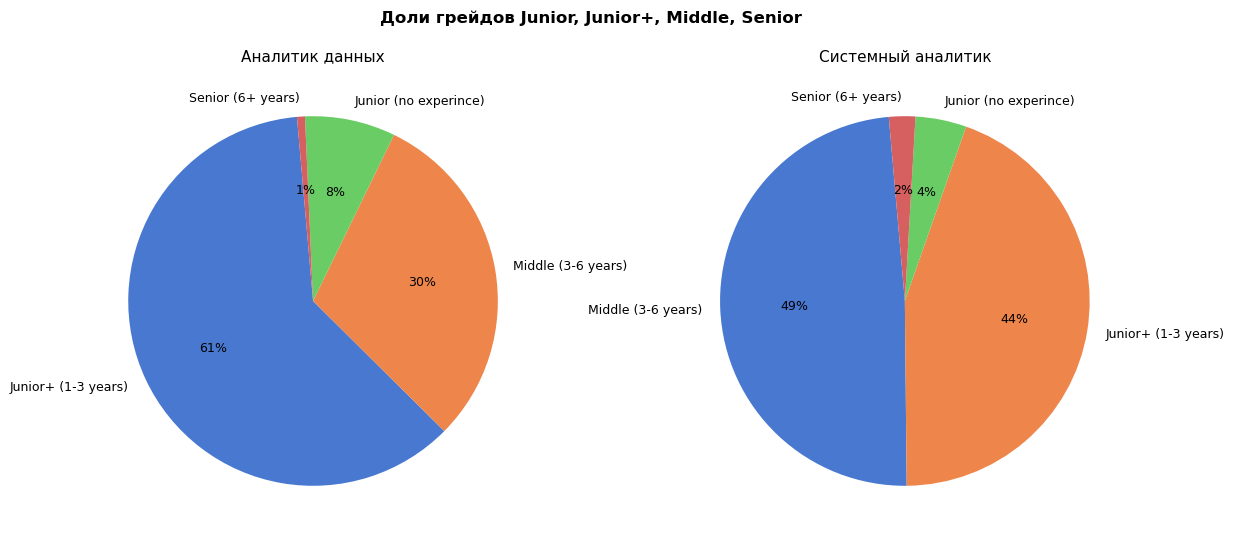

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#строим круговую диаграмму для Аналитиков данных
axes[0].pie(da,
          labels = [lbl for lbl, value in da.items()],
          autopct = '%1.0f%%',
          startangle = 95,
          textprops = {'fontsize': 9},
          colors = sns.color_palette('muted'))
axes[0].set_title('Аналитик данных', fontsize=11)

#строим круговую диаграмму для Системных аналитиков
axes[1].pie(sa,
       labels = [lbl for lbl, value in sa.items()],
       autopct = '%1.0f%%',
       startangle = 95,
       textprops = {'fontsize': 9},
       colors = sns.color_palette('muted'))
axes[1].set_title('Системный аналитик', fontsize=11)

plt.suptitle('Доли грейдов Junior, Junior+, Middle, Senior', fontsize=12, fontweight='bold')
plt.show()

**Промежуточные выводы:**  
Среди Аналитиков данных чаще всего ищут специалистов уровня Junior+ (61% вакансий), в то время как среди Системных аналитиков чаще требуются Middle специалисты. Начинающих специалистов Junior немного чаще ждут на вакансию Аналитик данных, чем Системный аналитик. А Senior крайне редко встречается в запросах обеих вакансий (1-2% от общего количества).

### Определение типичного места работы для DA и SA по различным параметрам.

In [35]:
#cоздаем функцию, которая будет выводить графики по параметрам в разрезе грейдов

def grades(df, parameter_, title_):
    fig, axes = plt.subplots(2, 4, figsize=(35, 10))
    plt.suptitle(title_ + ' для Junior, Junior+, Middle, Senior', fontsize=16, fontweight='bold')
    experience = ['Junior (no experince)',
                  'Junior+ (1-3 years)',
                  'Middle (3-6 years)',
                  'Senior (6+ years)']

#строим графики со скиллами
 
    for i in range(len(experience)):
      da_skills = (
          df.loc[(df['type_of_job'] == 'DA') & (df['experience'] == f'{experience[i]}')
          , parameter_]
          .value_counts()).reset_index().head(10)
      sa_skills = (
          df.loc[(df['type_of_job'] == 'SA') & (df['experience'] == f'{experience[i]}')
          , parameter_]
          .value_counts()).reset_index().head(10)

#график для Аналитиков данных
      sns.barplot(x='count', y=parameter_, data=da_skills, ax=axes[0, i], color='springgreen')
      axes[0, i].set_title(f"Аналитики {experience[i]}", fontsize=14)
      axes[0, i].set_xlabel('')
      axes[0, i].set_ylabel('')


#график для Системных аналитиков
      sns.barplot(x='count', y=parameter_, data=sa_skills, ax=axes[1, i], color='hotpink')
      axes[1, i].set_title(f"Системные аналитики {experience[i]}", fontsize=14)
      axes[1, i].set_xlabel('')
      axes[1, i].set_ylabel('')

#формируем поле для графиков    
    plt.subplots_adjust(wspace = 0.8)
    plt.show()


**Найдем ТОП работодателей**

In [36]:
#отберем ТОП-10 работодателей по количеству вакансий для каждого из типов

da_1 = job_listing.loc[job_listing['type_of_job'] == 'DA']['employer'].value_counts().reset_index().head(10)
sa_1 = job_listing.loc[job_listing['type_of_job'] == 'SA']['employer'].value_counts().reset_index().head(10)


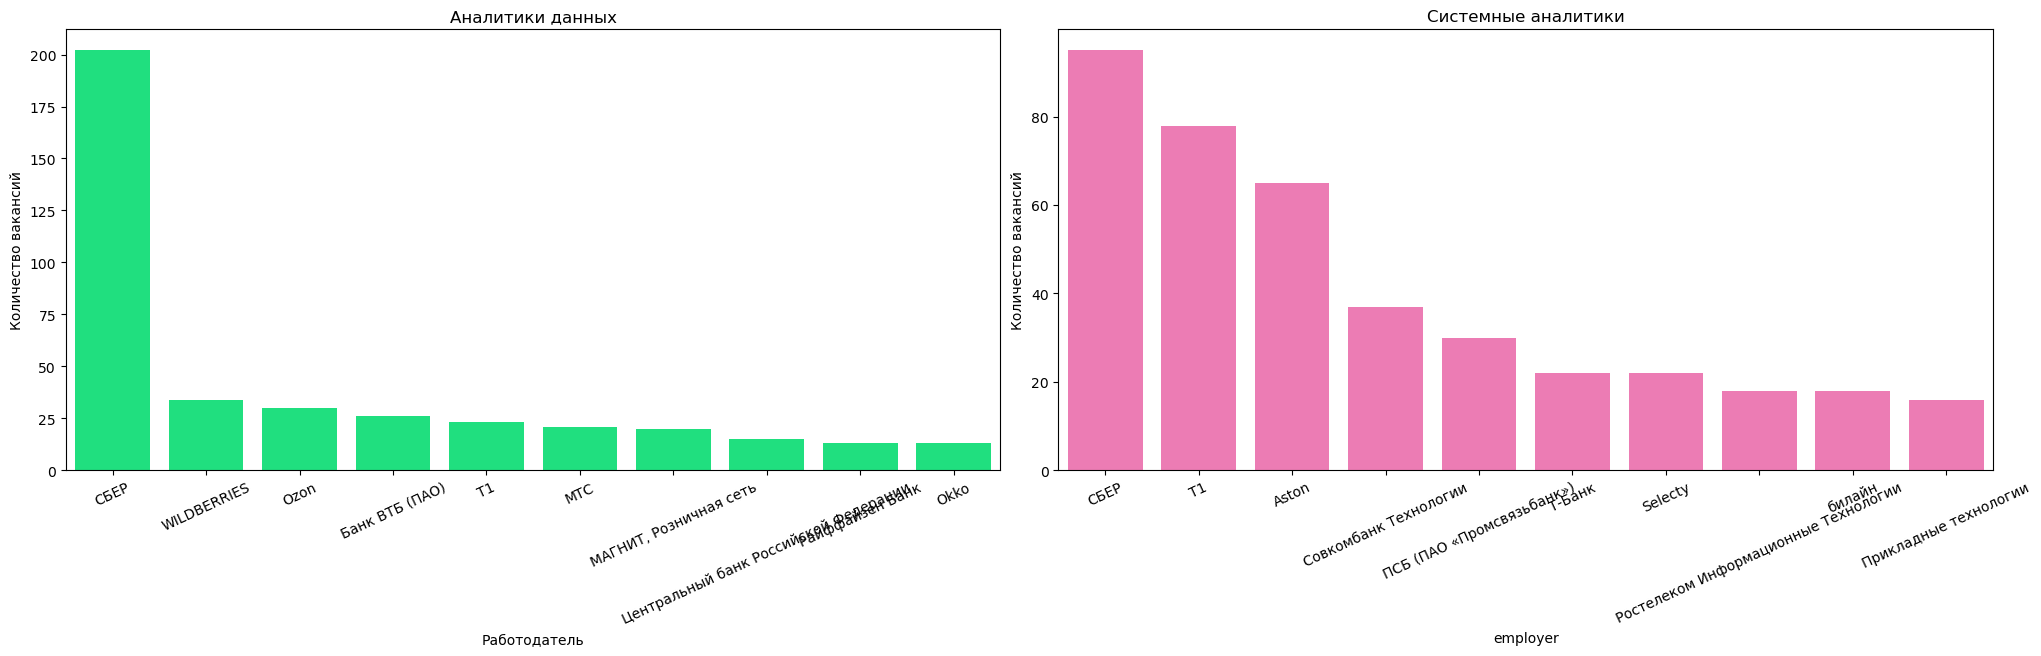

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig. tight_layout ()

#строим график для Аналитиков данных
sns.barplot(x='employer', y='count', data=da_1, ax=axes[0], color='springgreen')
axes[0].set_title("Аналитики данных")
axes[0].set_ylabel('Количество вакансий')
axes[0].set_xlabel('Работодатель')
axes[0].tick_params(axis='x', labelrotation=25)

#строим график для Системных аналитиков
sns.barplot(x='employer', y='count', data=sa_1, ax=axes[1], color='hotpink')
axes[1].set_title("Системные аналитики")
axes[1].set_ylabel('Количество вакансий')
axes[0].set_xlabel('Работодатель')
axes[1].tick_params(axis='x', labelrotation=25)


plt.show()


Однозначный лидер по количеству вакансий в обоих случаях - *СБЕР*. У системных аналитиков также выбиваются в лидеры следующие работодатели: *T1* и *Aston*.

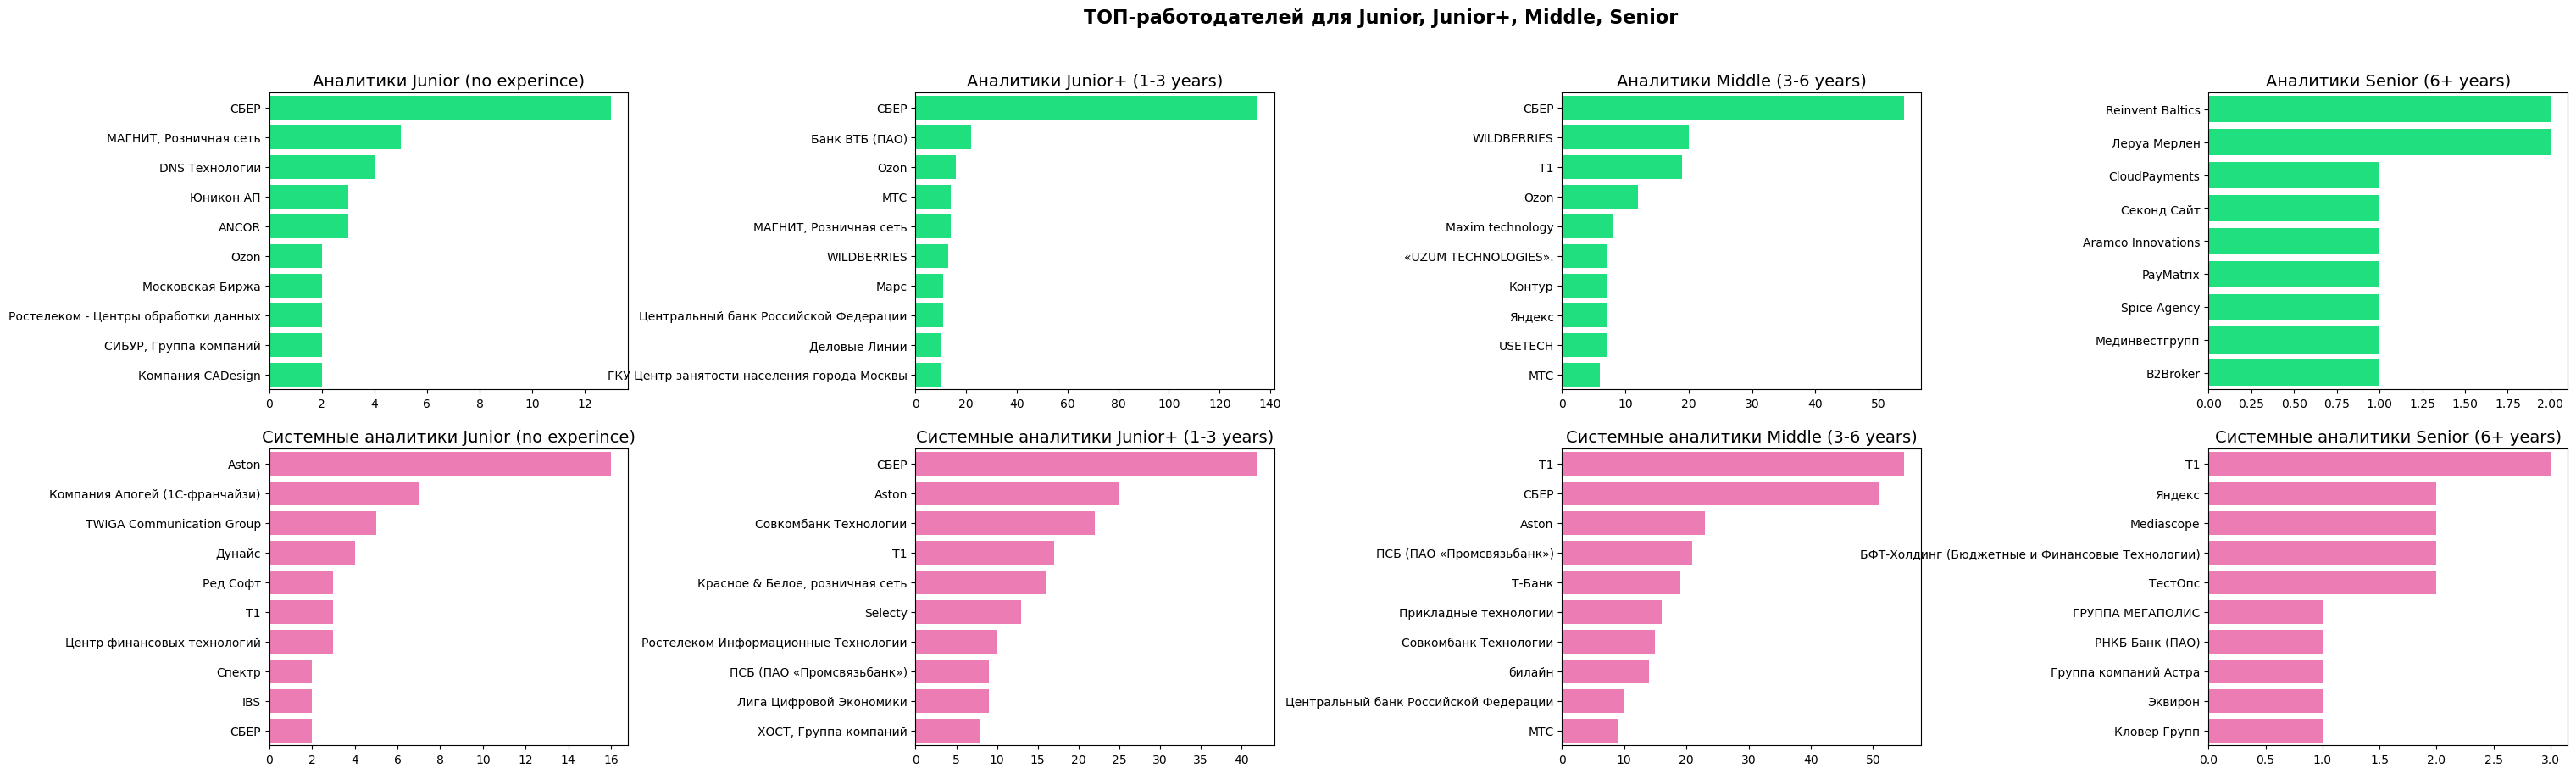

In [38]:
#построим графики с ТОПом работодателей по грейдам, используя ранее написанную функцию grades
df = job_listing
parameter_ = 'employer'
title_ = 'ТОП-работодателей'
grades(df, parameter_, title_)


**Промежуточные выводы:**  

**Аналитиков данных** всех грейдов, кроме Senior, активнее всего ищет *СБЕР*.  
Также много специалистов с опытом 1-3 года требуются в *Банк ВТБ (ПАО)* и *Ozon*.  
В Middle специалистах, кроме СБЕРА, нуждаются *WILDBERRIES* и *T1*.  
Совсем не много ищут специалистов без опыта (Junior) и экспертов (Senior). Отметим наиболее активно ищущих работодателей: *Магнит*, *DNS Технологии* и *Reinvent Baltics*, *Леруа Мерлен* соответственно.  

Активнее всего **Системных аналитиков** ищет *СБЕР* (уровни 1-3 года и 3-6 лет).  
Также среди лидеров-работодателей компания *T1*, здесь требуются специалисты всех уровней, но больше всего Middle.  
Комапния *Aston* активнее всех набирает специалистов без опыта (Junior) и находится на втором месте после СБЕРА по набору специалистов Junior+.  
В начинающих специалистах также нуждаются компании: *Компания Апогей (1C-франчайзи)* и *TWIGA communication Group*.


**Проанализируем зарплаты по грейдам**

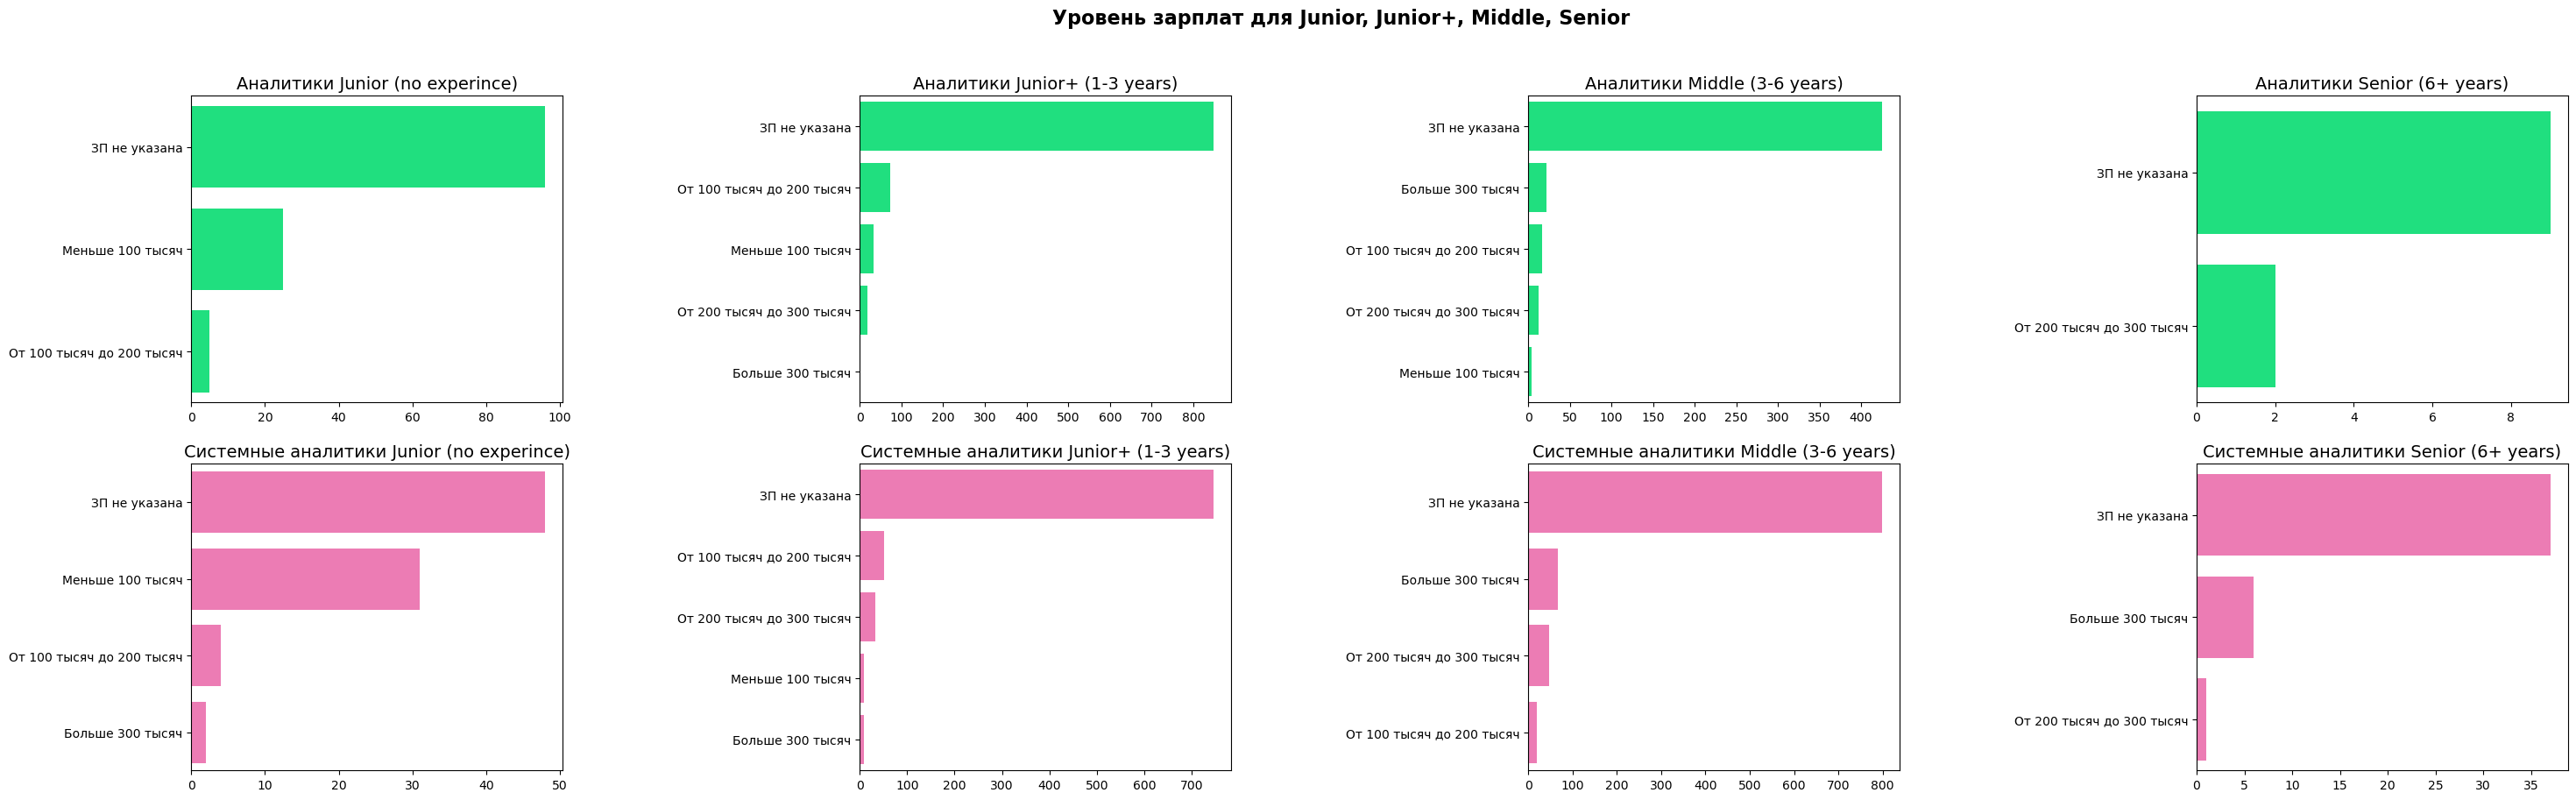

In [39]:
#построим графики с уровнем заработной платы по грейдам, используя ранее написанную функцию grades
df = job_listing
parameter_ = 'salary_bin'
title_ = 'Уровень зарплат'
grades(df, parameter_, title_)


Менее 100 тысяч получают специалисты без опыта обеих профессий. Работники с опытом 1-3 года могут зарабатывать от 100 до 200 тысяч рублей. Специалисты уровня Middle зарабатывают от 300 тысяч в месяц не зависимо от типа вакансии. И только у Senior можно наблюдать разницу в окладе: Аналитик данных зарабатывает до 300 тысяч, Системный аналитик от 300 тысяч рублей.

Попробуем также поработать с salary_from и salary_to, посчитать среднее между ними.


In [40]:
#напишем функцию для расчета средней заработной платы
def calculate_avg_salary(row):
 
    #извлекаем значения минимальной и максимальной заработной платы из строки
    min_salary = row['salary_from']
    max_salary = row['salary_to']

    #если оба значения заработной платы отсутствуют, возвращаем NaN
    if pd.isna(min_salary) and pd.isna(max_salary):
        return np.nan
    #если отсутствует минимальная заработная плата, возвращаем максимальную
    elif pd.isna(min_salary):
        return max_salary
    #если отсутствует максимальная заработная плата, возвращаем минимальную
    elif pd.isna(max_salary):
        return min_salary
    #если оба значения присутствуют, рассчитываем и возвращаем среднюю заработную плату
    else:
        return (min_salary + max_salary) / 2
job_listing['avg_salary'] = job_listing.apply(calculate_avg_salary, axis=1)

In [41]:
#фильтруем данные по типу вакансии
da_2 = job_listing[job_listing['type_of_job'] == 'DA']
sa_2 = job_listing[job_listing['type_of_job']== 'SA']

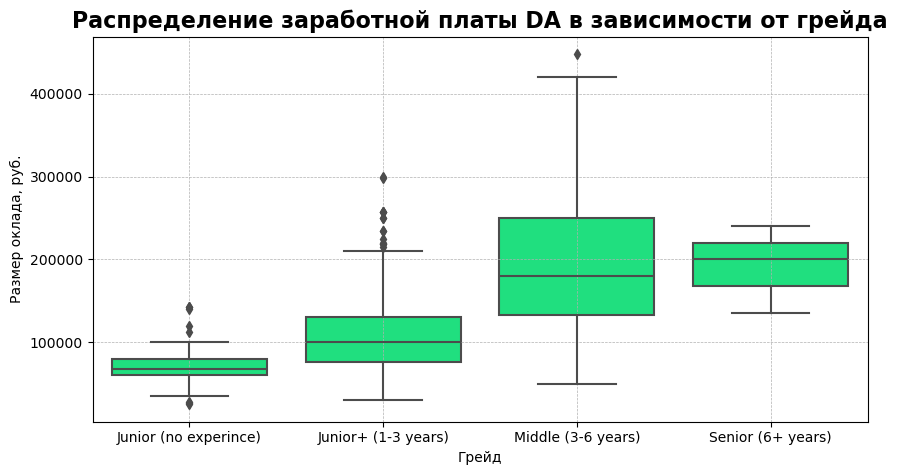

In [42]:
plt.figure(figsize=(10, 5))

#построим boxplot для зарплат Аналитика данных
sns.boxplot(data=da_2, x="experience", y="avg_salary", color='springgreen')

plt.title('Распределение заработной платы DA в зависимости от грейда', fontsize=16, fontweight='bold')
plt.xlabel('Грейд')
plt.ylabel('Размер оклада, руб.')

#добавим сетку на график
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

#отобразим график
plt.show()

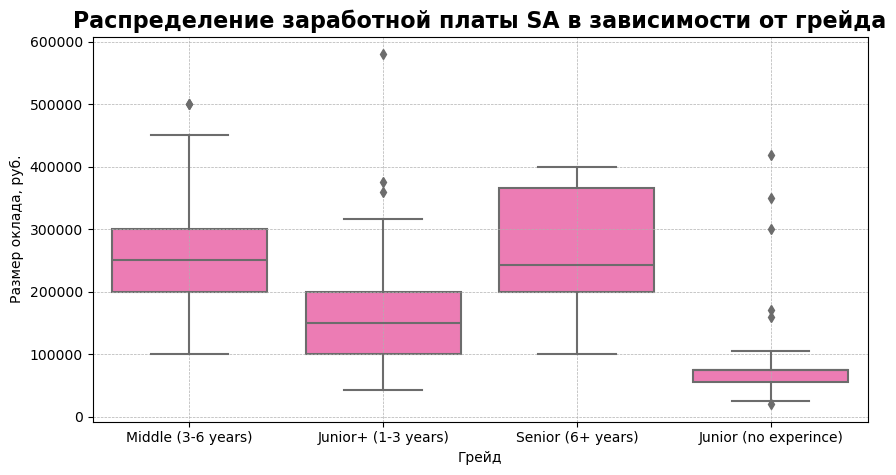

In [43]:
plt.figure(figsize=(10, 5))

#построим boxplot для зарплат Системного аналитика
sns.boxplot(data=sa_2, x="experience", y="avg_salary", color='hotpink')

plt.title('Распределение заработной платы SA в зависимости от грейда', fontsize=16, fontweight='bold')
plt.xlabel('Грейд')
plt.ylabel('Размер оклада, руб.')

#добавим сетку на график
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

#отобразим график
plt.show()

*Смотрим, подтвердились ли предварительные выводы по salary_bin.*  

**Промежуточные выводы:**  
- Джуниоры обеих профессий действительно получают зарплату до 100 тыс рублей.  
- Работники с опытом 1-3 года могут зарабатывать от 100 до 200 тысяч рублей - да, но это скорее справедливо для Системных аналитиков, т.к. отдельный боксплот показывает, что Аналитик данных получает в среднем около 100 тыс рублей.  
- По Мидл специалистам также выявлена разница в зарплате, которую не было видно при изучнии поля salary_bin: Системные аналитики получают в среднем 250 тыс рублей, в то время как Аналитики данных того же уровня - чуть меньше 200 тыс рублей.  
- Заплата Серьора у Аналитиков данных в среднем находится на уровне 200 тыс рублей, в то время как у Системных аналитиков от 200 тыс она только начинается и может достигать почти 400 тыс рублей.


**Проанализируем тип занятости по типу вакансии**

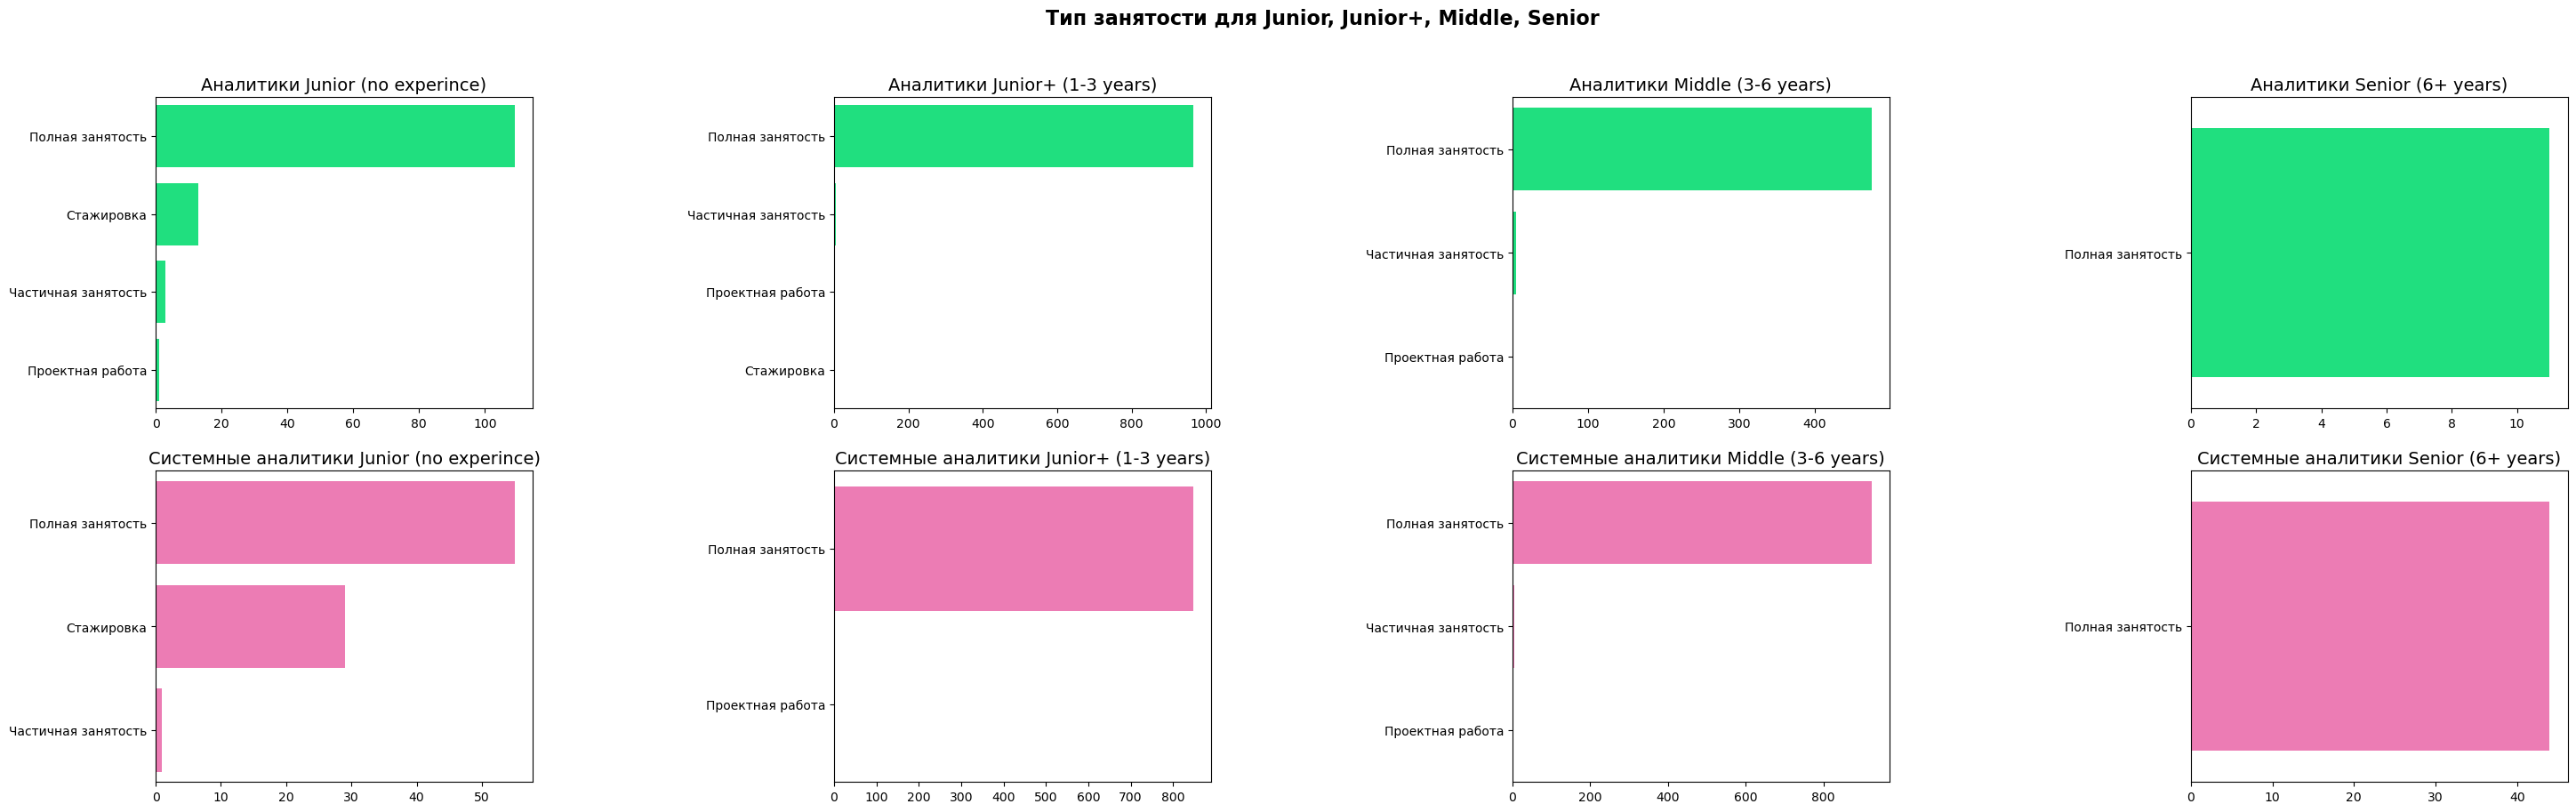

In [44]:
df = job_listing
parameter_ = 'employment'
title_ = 'Тип занятости'
grades(df, parameter_, title_)

**Промежуточные выводы:**  
Все вакансии, кроме Junior без опыта, имеют запрос на *Полную занятость*.  
У Джунов также присутствуют вакансии со *Стажировкой*, причем у Системных аналитиков таких вакансий в несколько раз больше.

**Проанализируем график работы по типу вакансии**

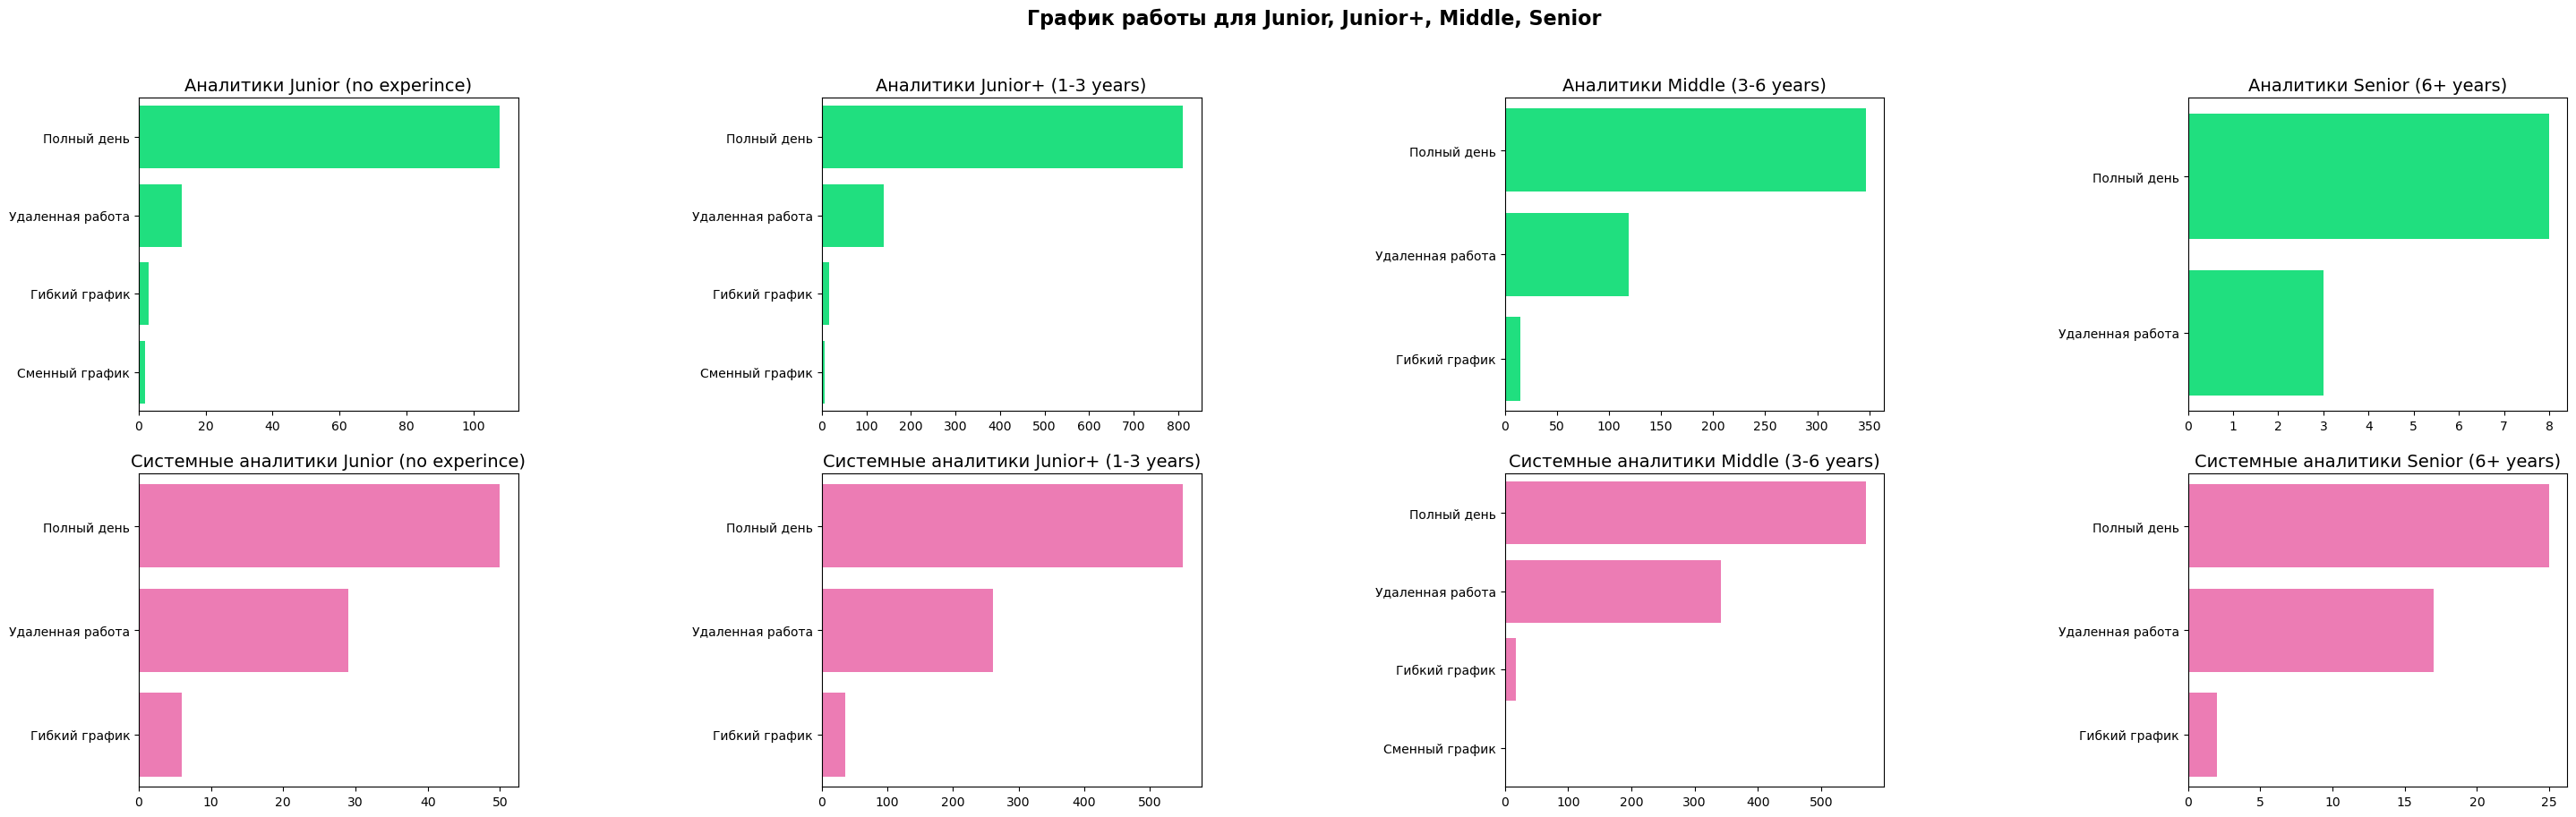

In [45]:
df = job_listing
parameter_ = 'schedule'
title_ = 'График работы'
grades(df, parameter_, title_)

**Промежуточные выводы:**  
Во всех вакансиях преобладает график работы: *Полный день*.  
Также везде встречается *Удаленная работа*, но с бОльшим преобладанием в SA (около половины вакансий).  
У Системных аналитиков бывает *Гибкий график*, чего практически не встречается у Аналитиков данных.

### Определение наиболее желаемого кандидата по параметрам hard skills и soft skills.

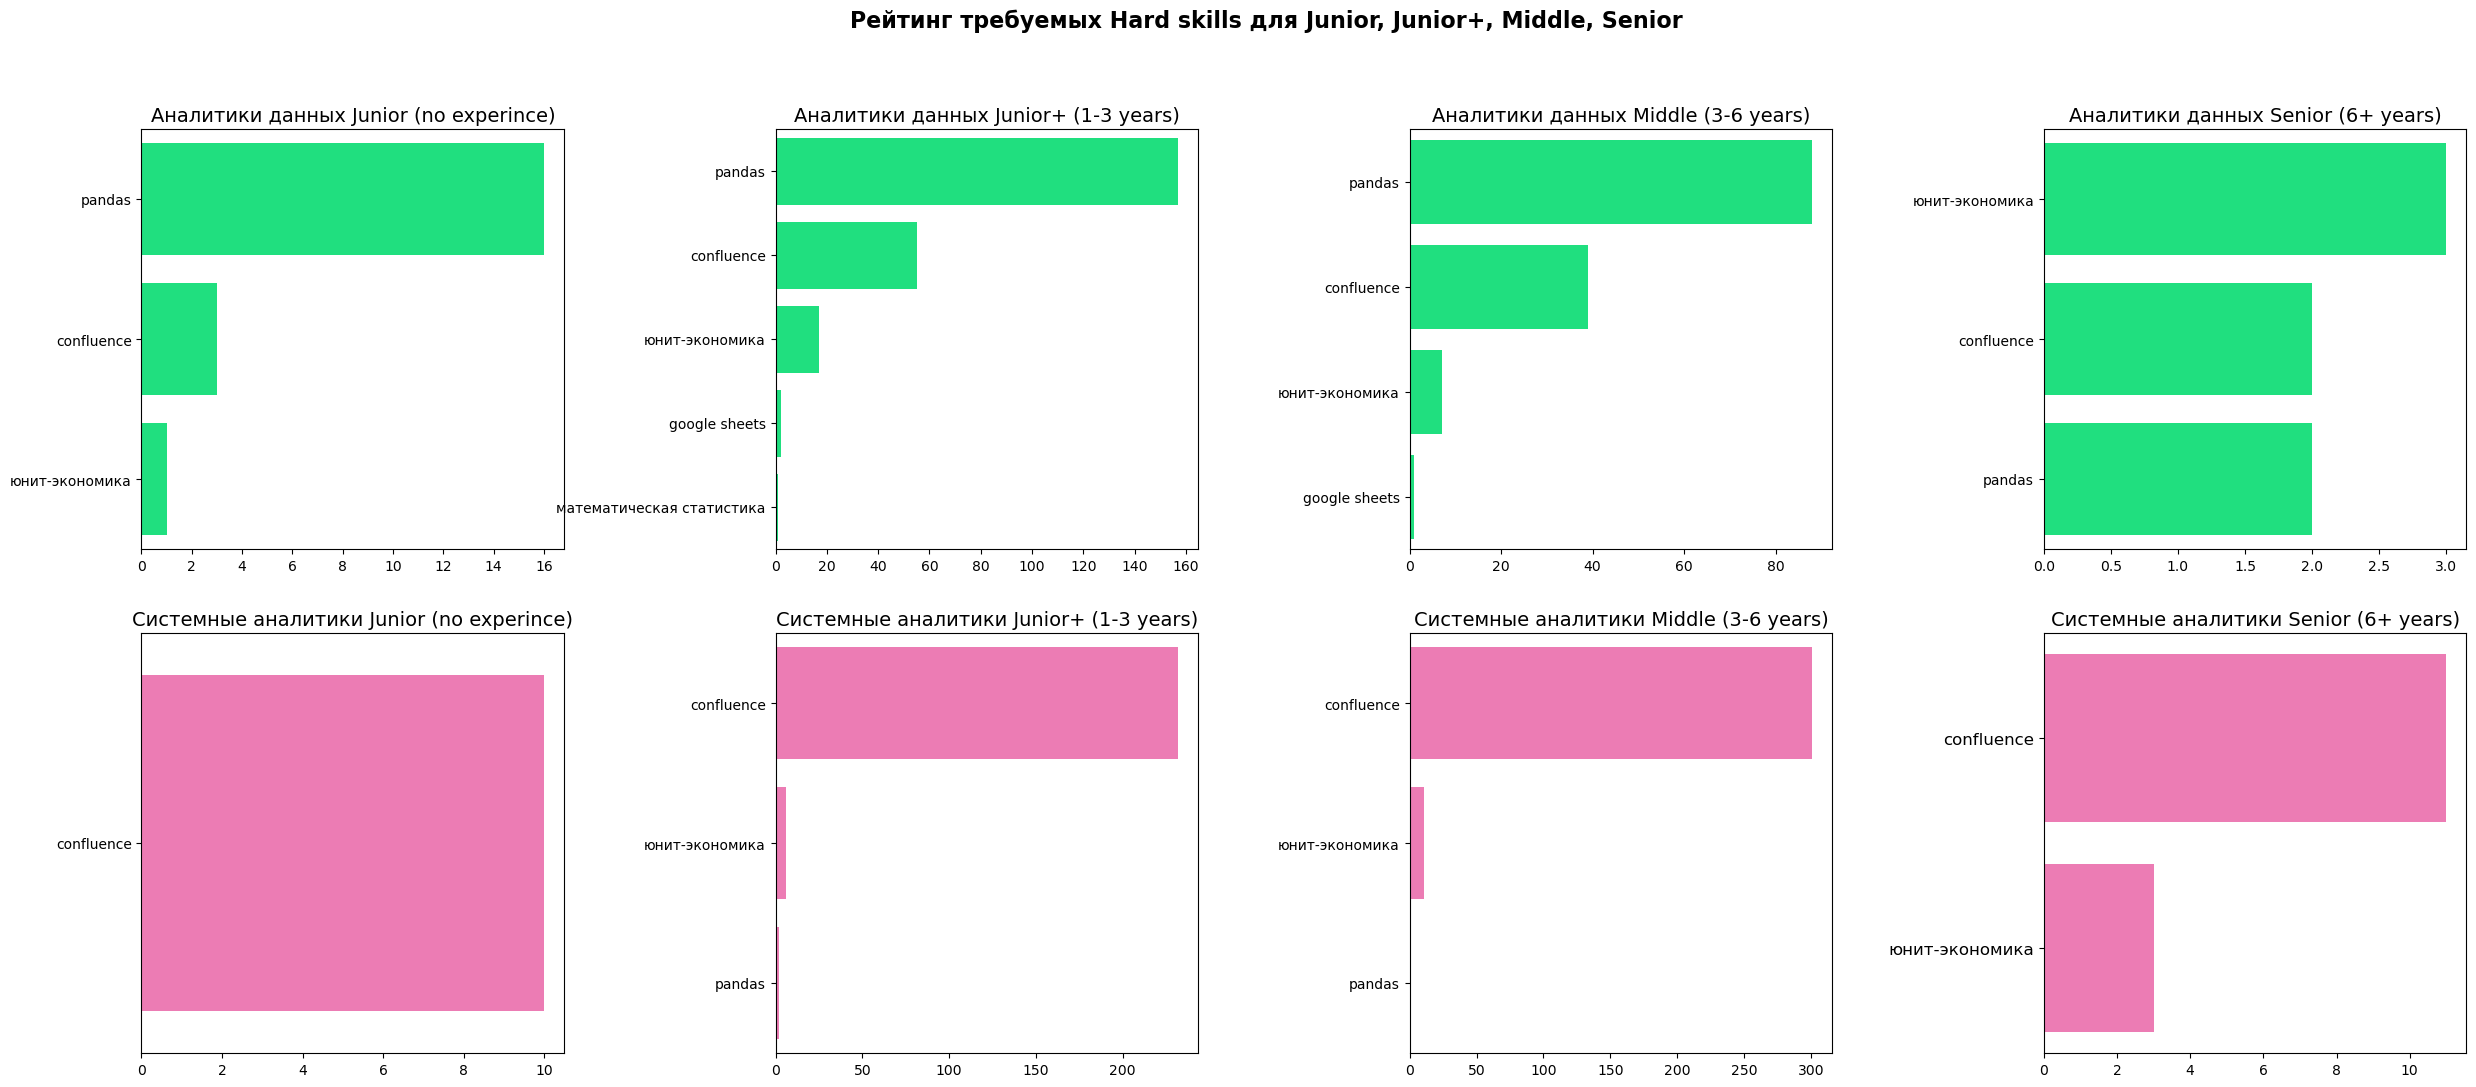

In [46]:
#составляем рейтинг востребованных хард скиллов
all_hard_skills = job_listing[['id',
                         'type_of_job',
                         'experience',
                         'hard_skills_from_description'
                         ]].reset_index(drop=True)

#преобразовываем значения скиллов в список для дальнейшей работы с ними
all_hard_skills['hard_skills_from_description'] = all_hard_skills['hard_skills_from_description'].str.split(',')

#выводим каждый скилл отдельной строкой
all_hard_skills = all_hard_skills.explode('hard_skills_from_description')

#приводим данные к нижнему регистру и убираем пробелы
all_hard_skills['hard_skills_from_description'] = (all_hard_skills['hard_skills_from_description'].str.lower().str.strip())


#создаем поле для диаграмм
fig, axes = plt.subplots(2, 4, figsize=(30, 12))
plt.suptitle('Рейтинг требуемых Hard skills для Junior, Junior+, Middle, Senior', fontsize=16, fontweight='bold')


experience = ['Junior (no experince)',
              'Junior+ (1-3 years)',
              'Middle (3-6 years)',
              'Senior (6+ years)']

for i in range(len(experience)):
  da_hard_skills = (
      all_hard_skills.loc[(all_hard_skills['type_of_job'] == 'DA') & (all_hard_skills['experience'] == f'{experience[i]}')
      , 'hard_skills_from_description']
      .value_counts()).reset_index().head(10)
  sa_hard_skills = (
      all_hard_skills.loc[(all_hard_skills['type_of_job'] == 'SA') & (all_hard_skills['experience'] == f'{experience[i]}')
      , 'hard_skills_from_description']
      .value_counts()).reset_index().head(10)

#строим график для Аналитиков данных
  sns.barplot(x='count', y='hard_skills_from_description', data=da_hard_skills, ax=axes[0, i], color='springgreen')
  axes[0, i].set_title(f"Аналитики данных {experience[i]}", fontsize=14)
  axes[0, i].set_xlabel('')
  axes[0, i].set_ylabel('')
  
#строим график для Системных аналитиков
  sns.barplot(x='count', y='hard_skills_from_description', data=sa_hard_skills, ax=axes[1, i], color='hotpink')
  axes[1, i].set_title(f"Системные аналитики {experience[i]}", fontsize=14)
  axes[1, i].set_xlabel('')
  axes[1, i].set_ylabel('')
    
plt.yticks(fontsize=12)
plt.subplots_adjust(wspace = 0.5)
plt.show()


 

**Промежуточные выводы:**  
Для Аналитика данных самым востребованным является хард скилл: *Pandas*.  
Системному аналитику всех уровней необходимо владеть *Confluence* (онлайн-система для совместной работы с документами).



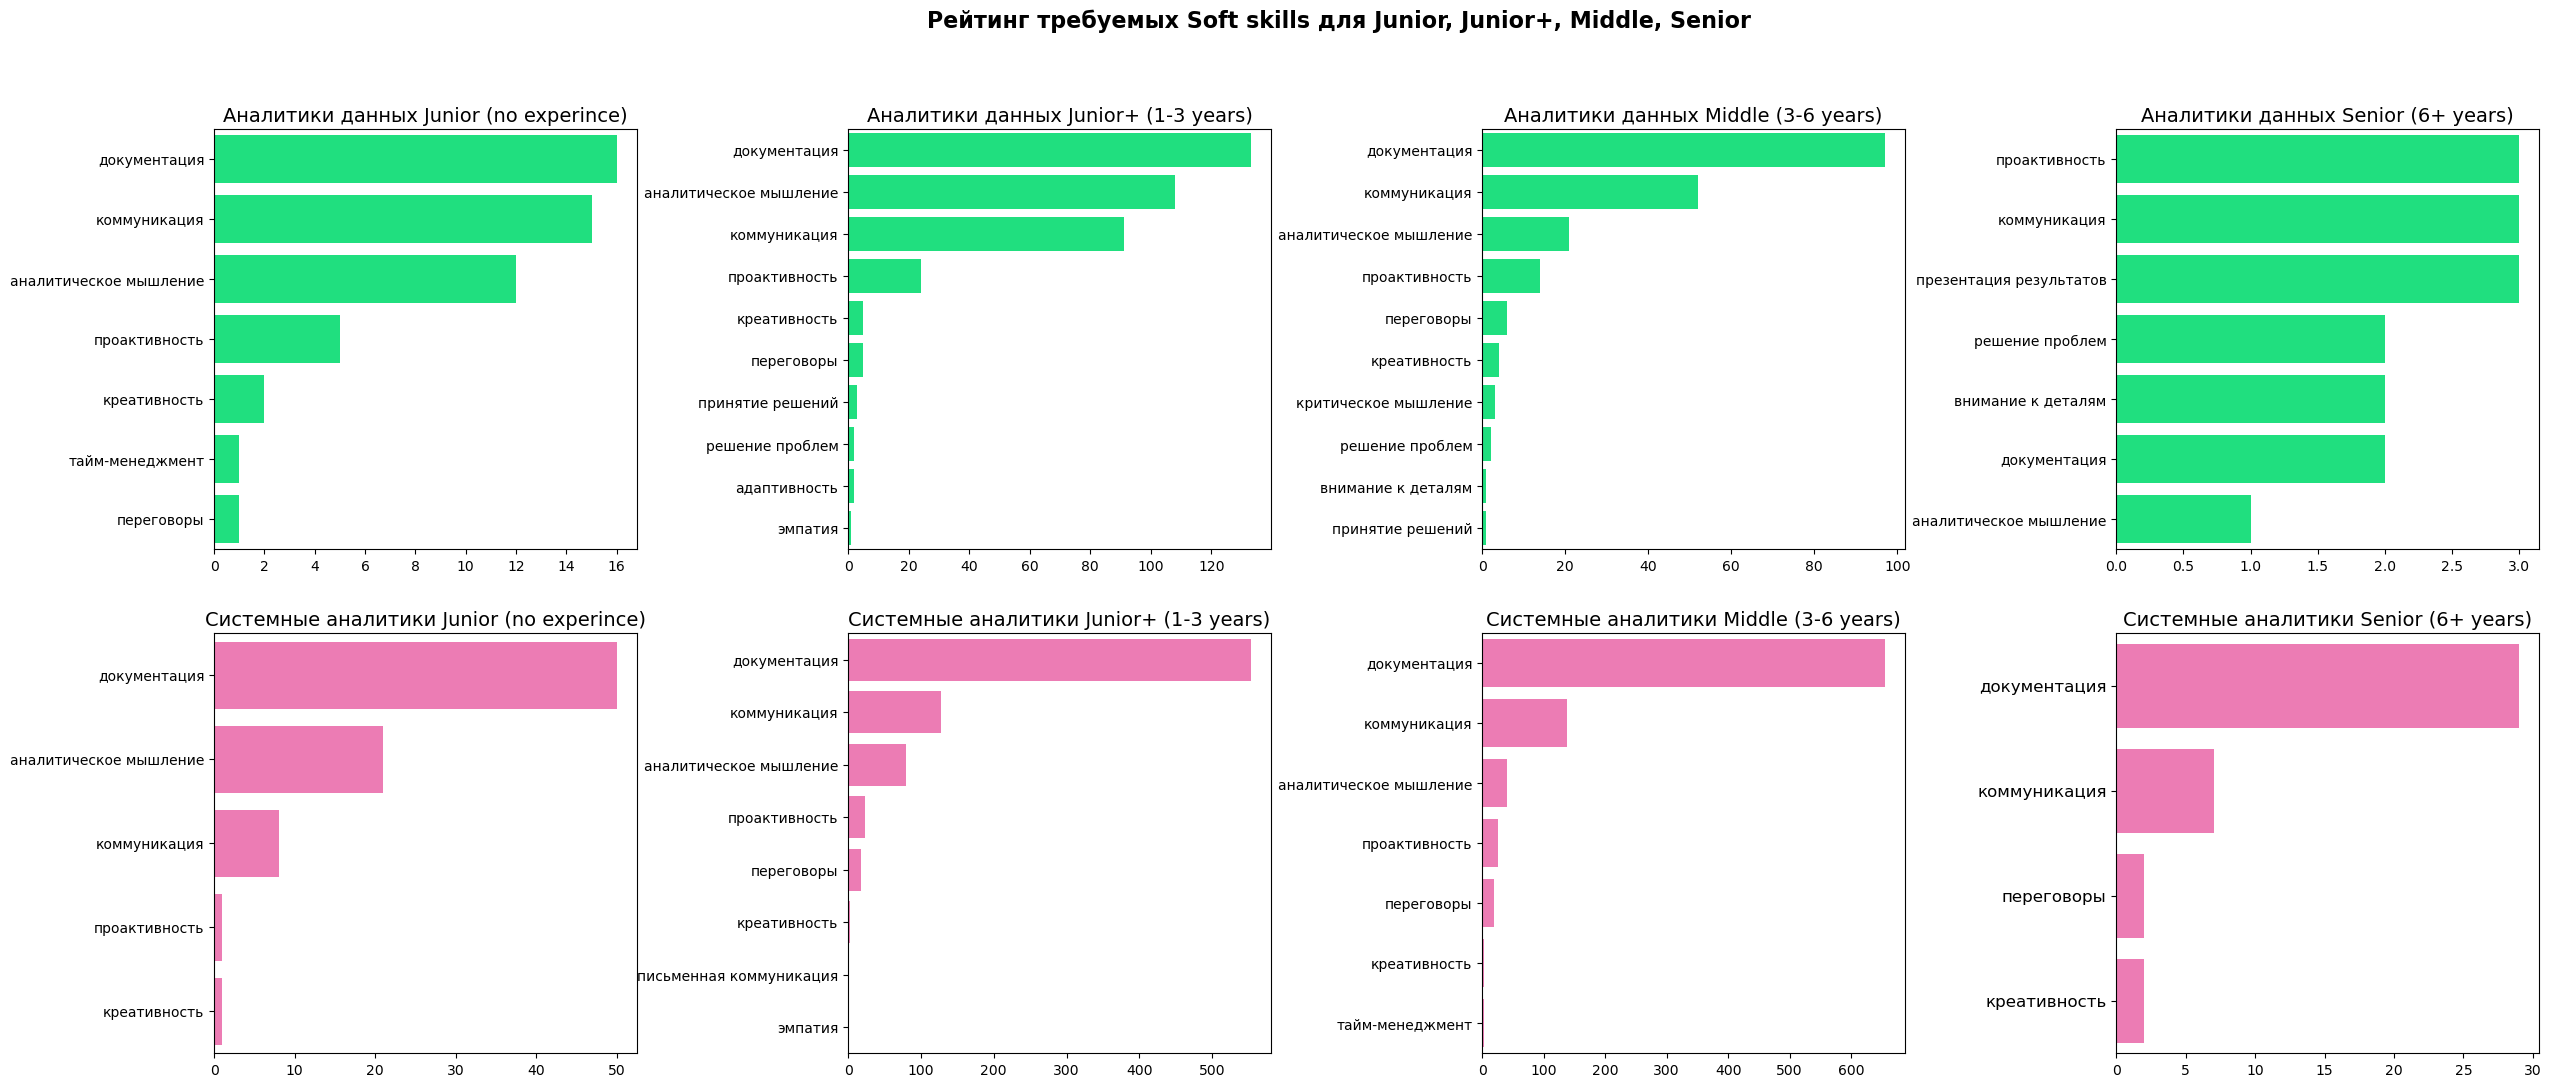

In [47]:
#составляем рейтинг востребованных софт скиллов
all_soft_skills = job_listing[['id',
                         'type_of_job',
                         'experience',
                         'soft_skills_from_description'
                         ]].reset_index(drop=True)

#преобразовываем значения скиллов в список для дальнейшей работы с ними
all_soft_skills['soft_skills_from_description'] = all_soft_skills['soft_skills_from_description'].str.split(',')

#выводим каждый скилл отдельной строкой
all_soft_skills = all_soft_skills.explode('soft_skills_from_description')

#приводим данные к нижнему регистру и убираем пробелы
all_soft_skills['soft_skills_from_description'] = (all_soft_skills['soft_skills_from_description'].str.lower().str.strip())


#создаем поле для диаграмм
fig, axes = plt.subplots(2, 4, figsize=(30, 12))
plt.suptitle('Рейтинг требуемых Soft skills для Junior, Junior+, Middle, Senior', fontsize=16, fontweight='bold')


experience = ['Junior (no experince)',
              'Junior+ (1-3 years)',
              'Middle (3-6 years)',
              'Senior (6+ years)']

for i in range(len(experience)):
  da_soft_skills = (
      all_soft_skills.loc[(all_soft_skills['type_of_job'] == 'DA') & (all_soft_skills['experience'] == f'{experience[i]}')
      , 'soft_skills_from_description']
      .value_counts()).reset_index().head(10)
  sa_soft_skills = (
      all_soft_skills.loc[(all_soft_skills['type_of_job'] == 'SA') & (all_soft_skills['experience'] == f'{experience[i]}')
      , 'soft_skills_from_description']
      .value_counts()).reset_index().head(10)

#строим график для Аналитиков данных
  sns.barplot(x='count', y='soft_skills_from_description', data=da_soft_skills, ax=axes[0, i], color='springgreen')
  axes[0, i].set_title(f"Аналитики данных {experience[i]}", fontsize=14)
  axes[0, i].set_xlabel('')
  axes[0, i].set_ylabel('')
  
#строим график для Системных аналитиков
  sns.barplot(x='count', y='soft_skills_from_description', data=sa_soft_skills, ax=axes[1, i], color='hotpink')
  axes[1, i].set_title(f"Системные аналитики {experience[i]}", fontsize=14)
  axes[1, i].set_xlabel('')
  axes[1, i].set_ylabel('')
    
plt.yticks(fontsize=12)
plt.subplots_adjust(wspace = 0.5)
plt.show()

**Промежуточные выводы:**  
Всем аналитикам необходимо умение работать с  *Документацией*.  
Также немаловажно обладать навыками *Коммуникации* в любой профессии и на любом уровне.  
*Аналитическое мышление* важно в обеих профессиях и на всех уровнях, кроме Senior (здесь оно отходит на втрой план).  
Для Senior важны *Проактивность* и *Презентация результатов*.


**Проанализируем также поле key_skills_from_key_skills_field**

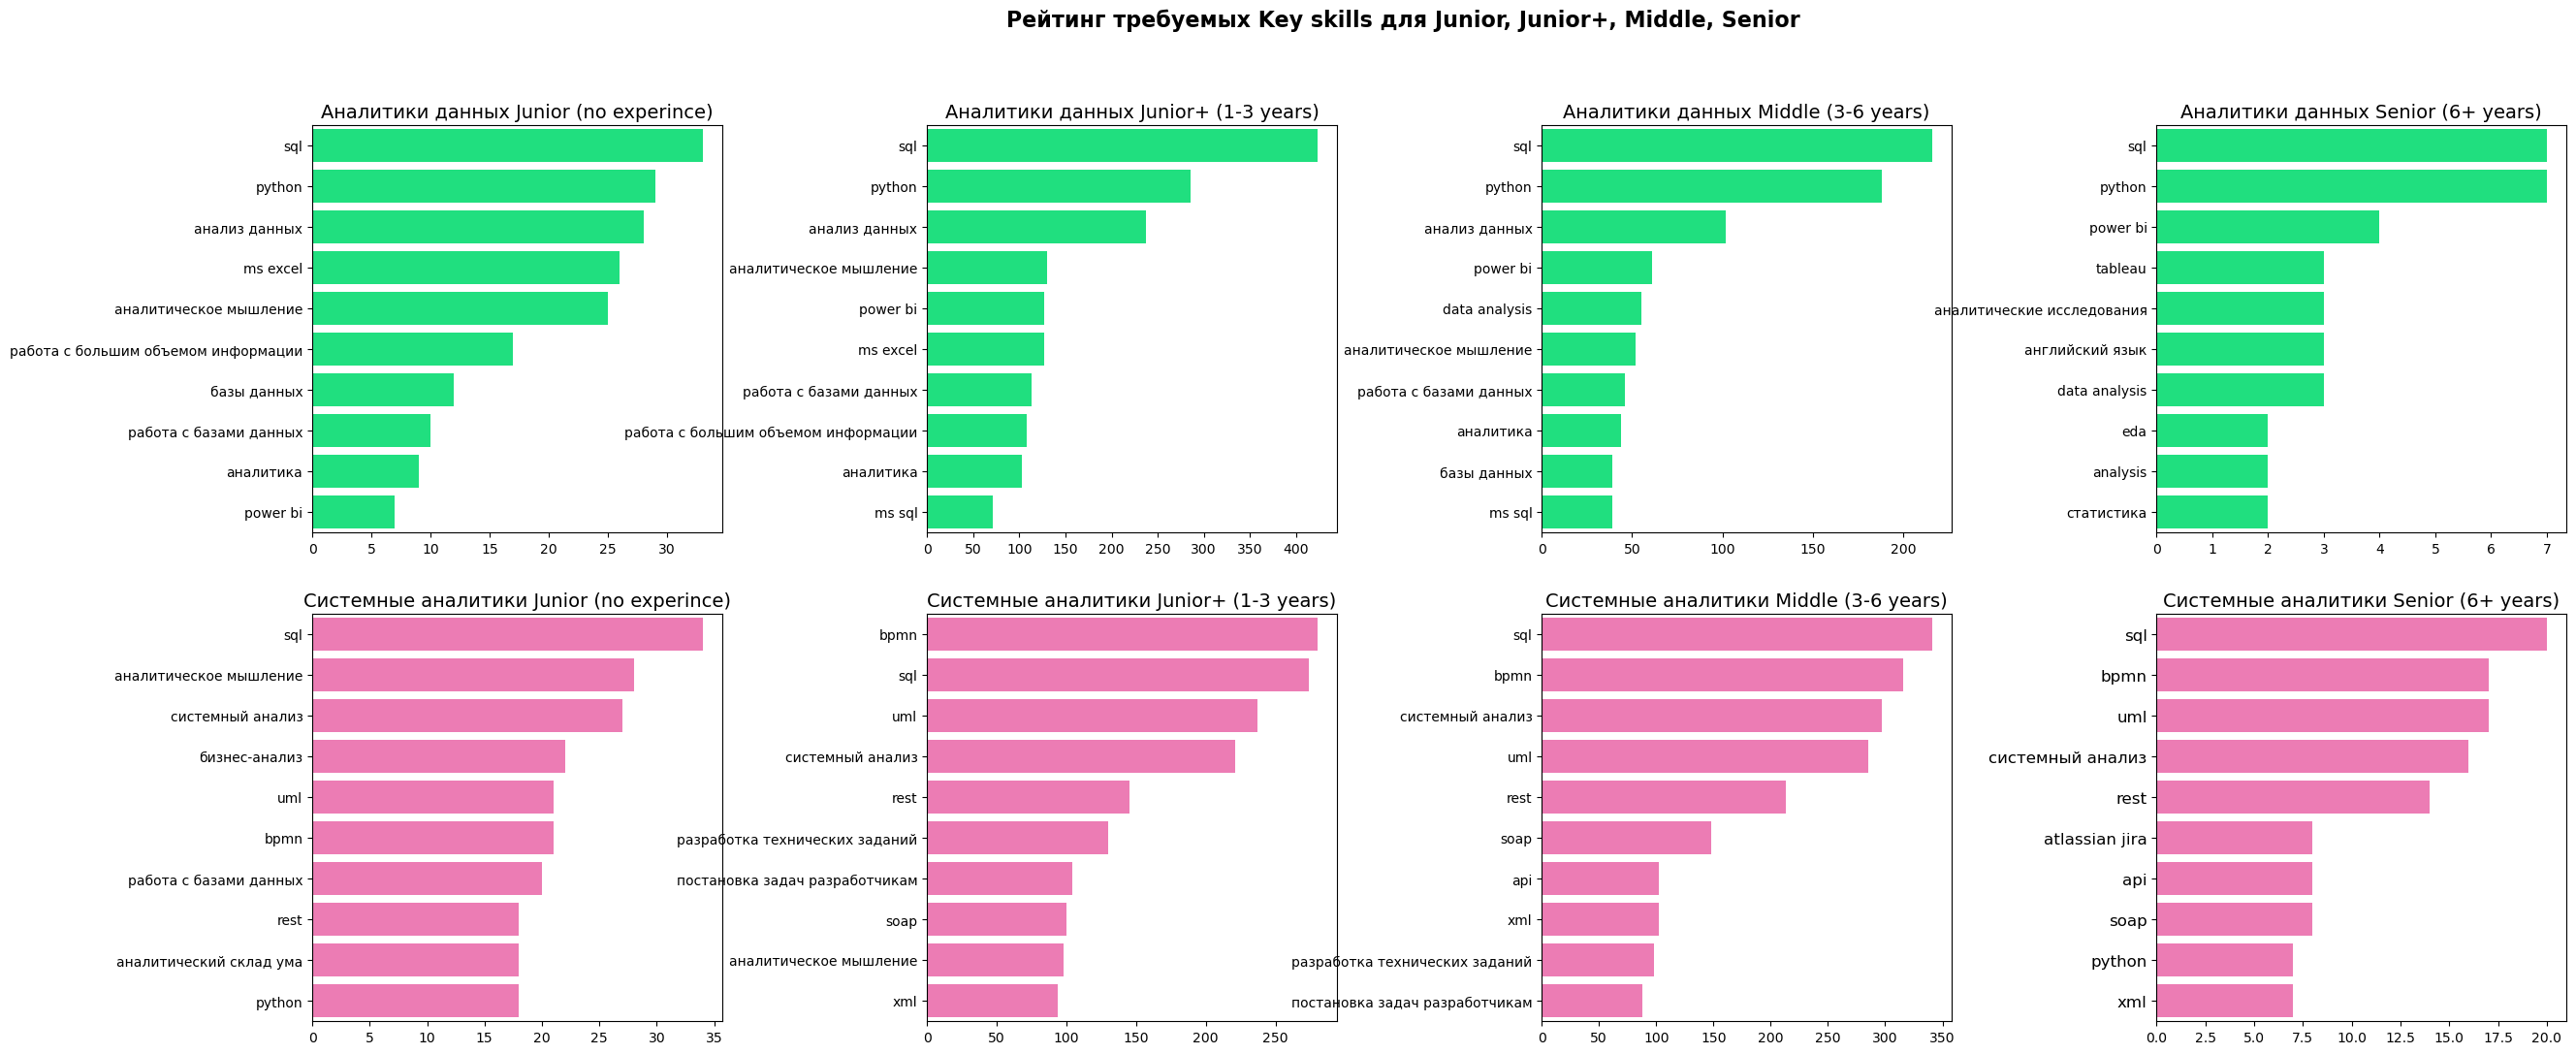

In [48]:
#составляем рейтинг востребованных ключевых навыков
all_key_skills = job_listing[['id',
                         'type_of_job',
                         'experience',
                         'key_skills_from_key_skills_field'
                         ]].reset_index(drop=True)

#преобразовываем значения скиллов в список для дальнейшей работы с ними
all_key_skills['key_skills_from_key_skills_field'] = all_key_skills['key_skills_from_key_skills_field'].str.split(',')

#выводим каждый скилл отдельной строкой
all_key_skills = all_key_skills.explode('key_skills_from_key_skills_field')

#приводим данные к нижнему регистру и убираем пробелы
all_key_skills['key_skills_from_key_skills_field'] = (all_key_skills['key_skills_from_key_skills_field'].str.lower().str.strip())


#создаем поле для диаграмм
fig, axes = plt.subplots(2, 4, figsize=(30, 12))
plt.suptitle('Рейтинг требуемых Key skills для Junior, Junior+, Middle, Senior', fontsize=16, fontweight='bold')


experience = ['Junior (no experince)',
              'Junior+ (1-3 years)',
              'Middle (3-6 years)',
              'Senior (6+ years)']

for i in range(len(experience)):
  da_key_skills = (
      all_key_skills.loc[(all_key_skills['type_of_job'] == 'DA') & (all_key_skills['experience'] == f'{experience[i]}')
      , 'key_skills_from_key_skills_field']
      .value_counts()).reset_index().head(10)
  sa_key_skills = (
      all_key_skills.loc[(all_key_skills['type_of_job'] == 'SA') & (all_key_skills['experience'] == f'{experience[i]}')
      , 'key_skills_from_key_skills_field']
      .value_counts()).reset_index().head(10)

#строим график для Аналитиков данных
  sns.barplot(x='count', y='key_skills_from_key_skills_field', data=da_key_skills, ax=axes[0, i], color='springgreen')
  axes[0, i].set_title(f"Аналитики данных {experience[i]}", fontsize=14)
  axes[0, i].set_xlabel('')
  axes[0, i].set_ylabel('')
  
#строим график для Системных аналитиков
  sns.barplot(x='count', y='key_skills_from_key_skills_field', data=sa_key_skills, ax=axes[1, i], color='hotpink')
  axes[1, i].set_title(f"Системные аналитики {experience[i]}", fontsize=14)
  axes[1, i].set_xlabel('')
  axes[1, i].set_ylabel('')
    
plt.yticks(fontsize=12)
plt.subplots_adjust(wspace = 0.5)
plt.show()

*Анализ дополнительного поля существенно обогатил наши данные*  

**Промежуточные выводы:**  

Перечислим 5 наиболее значимых ***Hard Skills для Аналитика данных***:  
1. SQL
2. Python (*Pandas*)
3. Анализ данных
4. Power BI (*система Business Intelligence, позволяет аккумулировать и структурировать данные из разных источников, преобразовывая их в единый формат. Затем из данных можно создавать визуализации различного типа и объединять их в интерактивные отчёты для наглядного анализа. Отчёты можно персонализировать по желаемым показателям.*)
5. MS Excel (*в начале карьеры*)  

5 наиболее значимых ***Hard Skills для Системного аналитика***:  
1. SQL
2. BPMN (*Business Process Model and Notation — это система условных обозначений и их описания для моделирования бизнес-процессов.*)
3. UML (*Unified Modeling Language — унифицированный язык моделирования, с его помощью можно автоматически генерировать код.*)
4. REST (*Representational State Transfer — архитектурный стиль взаимодействия компонентов распределённого приложения в сети; набор правил того, как программисту организовать написание кода серверного приложения, чтобы все системы легко обменивались данными и приложение можно было масштабировать.*)
5. Системный анализ (*на всех уровнях карьеры*)
6. Confluence (*выявлен при анализе поля hard skills*)

Помимо Hard Skills в обеих профессиях требуются и "мягкие" навыки, вот основной список ***Soft Skills для DA и SA***:  
1. Документация
2. Коммуникация
3. Аналитическое мышление

  


### Расчет помесячной динамики количества вакансий для DA и SA.

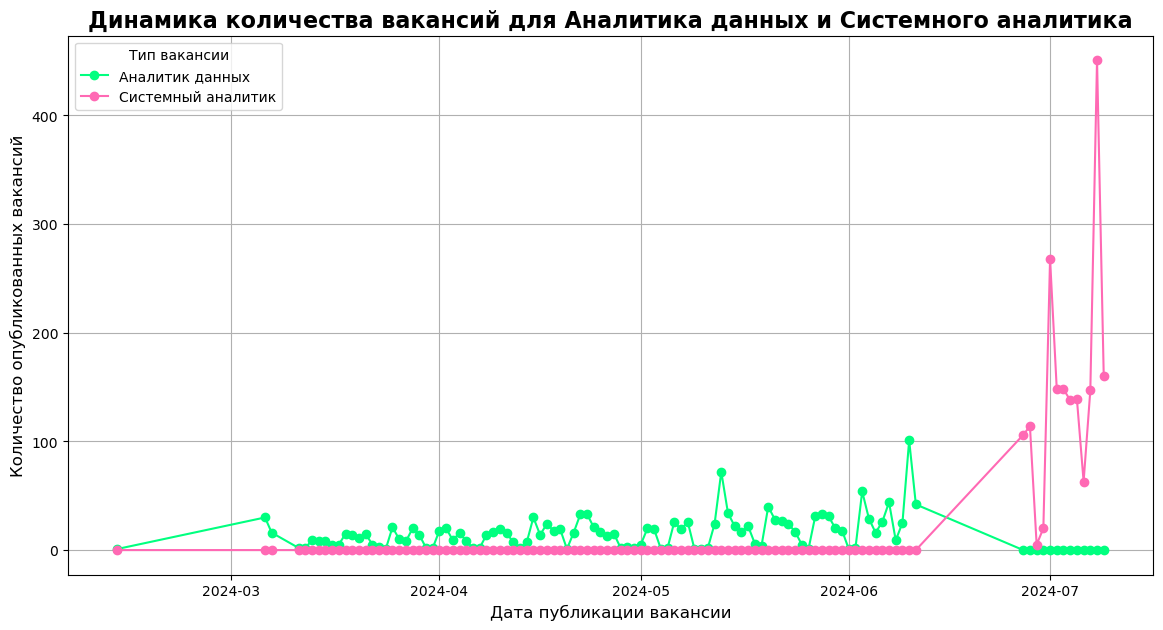

In [49]:
#создаем таблицу с датой публикации, отфильтрованную по возрастанию
date_dynamics = job_listing[['id', 'type_of_job', 'published_at']].sort_values(by='published_at')

#извлекаем дату
date_dynamics['published_at'] = date_dynamics['published_at'].dt.date

date_dynamics.pivot_table(index='published_at', columns='type_of_job', values = 'id', aggfunc='count')\
.fillna(0)\
.plot(figsize=(14, 7), style='o-', grid=True, color=['springgreen', 'hotpink'])

plt.title('Динамика количества вакансий для Аналитика данных и Системного аналитика',
          fontsize=16, fontweight='bold')
plt.xlabel('Дата публикации вакансии', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Количество опубликованных вакансий', fontsize=12)
plt.legend(['Аналитик данных', 'Системный аналитик'], title='Тип вакансии', loc=2)
plt.show()

In [50]:
min_published_date = job_listing['published_at'].min()
max_published_date = job_listing['published_at'].max()

print('Первая публикация вакансии:', min_published_date)
print('Последняя публикация вакансии:', max_published_date)

Первая публикация вакансии: 2024-02-13 21:45:51
Последняя публикация вакансии: 2024-07-09 12:47:11


**Промежуточные выводы:**  
В наших данных вакансии, опубликованные с 13.02.24 по 09.07.24.  
На протяжении всех 5 месяцев Аналитики данных требуются стабильно, но в небольших количествах.  
С Системными аналитиками ситуация другая: вакансии на них появляются только в конце июня и сразу в больших количествах.   
Похоже на ошибку при выгрузке данных.  

## 4. Общие выводы.

В данном исследовании работали с вакансиями **Аналитиков данных** и **Системных аналитиков**, опубликованных на **hh.ru** с 13.02.24 по 09.07.24.  

В исходных данных были **1801 вакансия по Аналитикам данных** и **1915 вакансий по Системным аналитикам**.  

В исследовании **4 грейда** специалистов:

**Junior** - начинающий специалист без опыта работы;

**Junior+** - специалист с опытом работы от 1 до 3-х лет;

**Middle** - специалист с опытом от 3-х до 6-ти лет;

**Senior** - эксперт с опытом более 6-ти лет.  

Среди Аналитиков данных чаще всего ищут специалистов уровня **Junior+** (61% вакансий), в то время как среди Системных аналитиков чаще требуются **Middle** специалисты.  
Начинающих специалистов Junior немного чаще ждут на вакансию Аналитик данных, чем Системный аналитик.  
А Senior крайне редко встречается в запросах обеих вакансий (1-2% от общего количества).

**Аналитиков данных** всех грейдов, кроме Senior, активнее всего ищет *СБЕР*.  
Также много специалистов с опытом 1-3 года требуются в *Банк ВТБ (ПАО)* и *Ozon*.  
В Middle специалистах, кроме СБЕРА, нуждаются *WILDBERRIES* и *T1*.  
Совсем не много ищут специалистов без опыта (Junior) и экспертов (Senior). Отметим наиболее активно ищущих работодателей: *Магнит*, *DNS Технологии* и *Reinvent Baltics*, *Леруа Мерлен* соответственно.  

Активнее всего **Системных аналитиков** ищет *СБЕР* (уровни 1-3 года и 3-6 лет).  
Также среди лидеров-работодателей компания *T1*, здесь требуются специалисты всех уровней, но больше всего Middle.  
Комапния *Aston* активнее всех набирает специалистов без опыта (Junior) и находится на втором месте после СБЕРА по набору специалистов Junior+.  
В начинающих специалистах также нуждаются компании: *Компания Апогей (1C-франчайзи)* и *TWIGA communication Group*.  

**Джуниоры** обеих профессий получают зарплату до 100 тыс рублей.  
Работники с опытом **1-3 года** могут зарабатывать от 100 до 200 тысяч рублей, что справедливо для Системных аналитиков. Аналитик данных уровня Junior+ получает в среднем около 100 тыс рублей.  
По **Мидл** специалистам также выявлена разница в зарплате: Системные аналитики получают в среднем 250 тыс рублей, в то время как Аналитики данных того же уровня - чуть меньше 200 тыс рублей.  
Заплата **Серьора** у Аналитиков данных в среднем находится на уровне 200 тыс рублей, в то время как у Системных аналитиков от 200 тыс она только начинается и может достигать почти 400 тыс рублей.  

**Все вакансии**, кроме Junior без опыта, имеют запрос на *Полную занятость*.  
У **Джунов** также присутствуют вакансии со *Стажировкой*, причем у Системных аналитиков таких вакансий в несколько раз больше.  

**Во всех вакансиях** преобладает график работы: *Полный день*.  
Также везде встречается *Удаленная работа*, но с бОльшим преобладанием в SA (около половины вакансий).  
У Системных аналитиков бывает *Гибкий график*, чего практически не встречается у Аналитиков данных.  

**Если вы Аналитик данных**, то ваши перспективы можно описать так:
- Типичный работодатель: *СБЕР*, *Банк ВТБ (ПАО)* или *Ozon*.
- Зарплата на начальном этапе *до 100 тыс рублей*, при опыте 1-3 года *в среднем 100 тыс рублей* и при опыте от 3 лет и выше зарплата может достигать *почти 200 тыс рублей*.
- Вам предложат *Полную занятость* и, если вы Джун, есть возможность встретить *Стажировку*.
- График работы: *Полный день*, но есть возможность встретить и *Удаленную работу*.

**Если вы Системный аналитик**, то ваши перспективы можно описать следующим образом: 
- Типичный работодатель: *СБЕР*, *T1* или *Aston*.
- Зарплата на начальном этапе *до 100 тыс рублей*, при опыте 1-3 года *в среднем 150 тыс рублей* и при опыте от 3 лет и выше зарплата будет *в среднем 250 тыс рублей*.
- Вам предложат *Полную занятость* и, если вы Джун, есть большая вероятность встретить *Стажировку*.
- График работы: *Полный день*, есть вероятность встретить *Удаленную работу*, а также в ряде случаев *Гибкий график*.


Перечислим 5 наиболее значимых ***Hard Skills для Аналитика данных***:  
1. SQL
2. Python (*Pandas*)
3. Анализ данных
4. Power BI (*система Business Intelligence, позволяет аккумулировать и структурировать данные из разных источников, преобразовывая их в единый формат. Затем из данных можно создавать визуализации различного типа и объединять их в интерактивные отчёты для наглядного анализа. Отчёты можно персонализировать по желаемым показателям.*)
5. MS Excel (*в начале карьеры*)  

5 наиболее значимых ***Hard Skills для Системного аналитика***:  
1. SQL
2. BPMN (*Business Process Model and Notation — это система условных обозначений и их описания для моделирования бизнес-процессов.*)
3. UML (*Unified Modeling Language — унифицированный язык моделирования, с его помощью можно автоматически генерировать код.*)
4. REST (*Representational State Transfer — архитектурный стиль взаимодействия компонентов распределённого приложения в сети; набор правил того, как программисту организовать написание кода серверного приложения, чтобы все системы легко обменивались данными и приложение можно было масштабировать.*)
5. Системный анализ (*на всех уровнях карьеры*)
6. Confluence (*выявлен при анализе поля hard skills*)

Помимо Hard Skills в обеих профессиях требуются и "мягкие" навыки, вот основной список ***Soft Skills для DA и SA***:  
1. Документация
2. Коммуникация
3. Аналитическое мышление

**Итак**, Аналитики данных и Системные аналитики имеют общие черты (тип занятости, софт скиллы), но различий между данными вакансиями намного больше. 
У Системного аналитика совсем другой состав необходимых хард скиллов, выше зарплата, больше вариантов по графику работы, другой список потенциальных работодателей.

